### Student Information
Name: Najma Previa Jati

Student ID: 111006226

GitHub ID: viajati

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk; nltk.download('punkt')

# load new dataset
df = pd.read_csv(
    r"C:\Users\user\Downloads\lab1\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv"
)
# keep only what we need
X = df[['text','label']].copy()

# add readable label
label_map = {1.0:'positive', 0.0:'neutral', -1.0:'negative'}
X['label_name'] = X['label'].map(label_map)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Exercise 1

# print first 3 documents 
for i in range(3):
    print(f"example {i+1}\n{X.loc[i,'text']}\n")

example 1
Calls on retards

example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

example 3
Seeing lots of red in the ticker.



In [4]:
# Exercise 2

# posts that mention "stock" or "market"
X[X['text'].str.contains(r"\bstock|market\b", case=False, na=False)].head(3)

# very short vs very long
X[X['text'].str.len()<200].head(3)
X[X['text'].str.len()>3000].head(2)

# has a $TICKER pattern like $AAPL
X[X['text'].str.contains(r"\$[A-Z]{2,5}", na=False)].head(5)

# has numbers (prices/dates)
X[X['text'].str.contains(r"\d", na=False)].head(5)


text  label label_name
3   Vision Marine Technologies Inc. is rewriting t...    1.0   positive
7   Confirmed not a trap. Its been like this for p...    0.0    neutral
8   Am I the only one seeing the cup & handle brea...    1.0   positive
9   HLGN is $10. Hurry and catch it now before it ...    1.0   positive
13  \r\nI’ve been doing pretty good with this, but...    0.0    neutral

In [5]:
# Exercise 3

# take positive only, then every 10th, show first 5
X[X['label_name']=='positive'][::10].head(5)


text  label label_name
3    Vision Marine Technologies Inc. is rewriting t...    1.0   positive
78   I think it’s gonna work itself out. I bought t...    1.0   positive
168  The obvious can also be refreshing from CNBC: ...    1.0   positive
219  Same. Back to break even after that last rip b...    1.0   positive
319  Etrade has a feed of news articles about how r...    1.0   positive

In [6]:
# Exercise 4
# simple checker per row (axis=1)

def check_missing_values(x):
    return ("The amoung of missing records is: ", int(x.isnull().sum()))
print(X.isnull().apply(lambda row: check_missing_values(row), axis=1).head())


0    (The amoung of missing records is: , 0)
1    (The amoung of missing records is: , 0)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 0)
dtype: object


In [7]:
# Exercise 5
buggy_examples = [
    {"id": "A", "text": np.nan},      # real NaN
    {"id": "B"},                      # missing key → NaN
    {"id": "C", "text": "NaN"},       # string "NaN"
    {"id": "D", "text": "None"},      # string "None"
    {"id": "E", "text": None},        # real Python None
    {"id": "F", "text": ""}           # empty string
]

buggy_df = pd.DataFrame(buggy_examples, columns=["id", "text"])
display(buggy_df)

# check with isnull()
print(buggy_df["text"].isnull())


id  text
0  A   NaN
1  B   NaN
2  C   NaN
3  D  None
4  E  None
5  F

0     True
1     True
2    False
3    False
4     True
5    False
Name: text, dtype: bool


In [8]:
# Fix: replace the fake missing values with actual np.nan
buggy_df["text"] = buggy_df["text"].replace(["NaN", "None", ""], np.nan)

# now check again
print(buggy_df["text"].isnull())

0    True
1    True
2    True
3    True
4    True
5    True
Name: text, dtype: bool


C:\Users\user\AppData\Local\Temp\ipykernel_8240\2653504601.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buggy_df["text"] = buggy_df["text"].replace(["NaN", "None", ""], np.nan)


What I observed is that .isnull() only works for actual np.nan or real Python None. It does not catch “fake” missing values like the string "NaN", the string "None", or an empty string '', because pandas treats those as ordinary text. That’s why some rows came back as False even though they look like missing values to us.

The fix is to explicitly replace those fake values with np.nan before running .isnull(). After doing this, pandas correctly recognizes all of them as missing.

In [9]:
# Exercise 6

df_sample = df.sample(n=100, random_state=42)

# If we type in these codes, we can see that df is the full dataset,
# while df_sample is the smaller 100-row dataset.

print("df has", len(df), "rows")
print("df_sample has", len(df_sample), "rows")

# df_sample is just a smaller portion of the data taken randomly
# from the bigger dataset. It’s used to work faster without 
# always needing the entire dataset.



df has 847 rows
df_sample has 100 rows


In [10]:
# If we take a look at the first few rows of each:
print(df.head())
print(df_sample.head())

# We can see that df starts at index 0, 1, 2, ...
# while df_sample might show random rows like 457, 342,...,
# because they were randomly pulled.

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

In [11]:
# If we compare the indexes directly:
print("First 10 indexes of df:", df.index[:10].tolist())
print("First 10 indexes of df_sample:", df_sample.index[:10].tolist())

# We notice that df indexes are continuous,
# but df_sample indexes are scattered.

First 10 indexes of df: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
First 10 indexes of df_sample: [457, 342, 280, 275, 843, 734, 96, 662, 109, 655]


In [12]:
# Finally, if we look at them side-by-side using concat:
pd.concat([df.head(5), df_sample.head(5)], axis=1)

# We can see 5 rows of df on the left and 5 rows of df_sample
# on the right, which makes the differences very clear.

type             datetime  post_id         subreddit  \
0    comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1    comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2    comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3       post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4    comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   
457      NaN                  NaN      NaN               NaN   
342      NaN                  NaN      NaN               NaN   
280      NaN                  NaN      NaN               NaN   
275      NaN                  NaN      NaN               NaN   
843      NaN                  NaN      NaN               NaN   

                                                 title                author  \
0      Retardation is on the menu boys! WSB is so back          StickyTip420   
1    Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2    How do you feel about a sitting president maki...          Btankersly66   
3                                Who knows more? $VMAR             emiljenfn   
4    The Trump administration is begging Xi Jinping...          Just-Big6411   
457                                                NaN                   NaN   
342                                                NaN                   NaN   
280                                                NaN                   NaN   
275                                                NaN                   NaN   
843                                                NaN                   NaN   

                                                   url  upvotes  downvotes  \
0                 https://i.redd.it/0yq2ftren8ue1.jpeg      0.0        NaN   
1                 https://i.redd.it/7tl6puv9waue1.jpeg    -15.0        NaN   
2    https://apnews.com/article/trump-truth-social-...      1.0        NaN   
3    https://www.reddit.com/r/stockstobuytoday/comm...     30.0        0.0   
4    https://edition.cnn.com/2025/04/10/politics/tr...      1.0        NaN   
457                                                NaN      NaN        NaN   
342                                                NaN      NaN        NaN   
280                                                NaN      NaN        NaN   
275                                                NaN      NaN        NaN   
843                                                NaN      NaN        NaN   

     upvote_ratio  ...                                                url  \
0             NaN  ...                                                NaN   
1             NaN  ...                                                NaN   
2             NaN  ...                                                NaN   
3            0.98  ...                                                NaN   
4             NaN  ...                                                NaN   
457           NaN  ...                https://i.redd.it/uajqu4kxl7ue1.png   
342           NaN  ...               https://i.redd.it/7tl6puv9waue1.jpeg   
280           NaN  ...  https://apnews.com/article/trump-truth-social-...   
275           NaN  ...               https://i.redd.it/7tl6puv9waue1.jpeg   
843           NaN  ...               https://i.redd.it/atvlo83gk4ue1.jpeg   

     upvotes  downvotes  upvote_ratio  \
0        NaN        NaN           NaN   
1        NaN        NaN           NaN   
2        NaN        NaN           NaN   
3        NaN        NaN           NaN   
4        NaN        NaN           NaN   
457      1.0        NaN           NaN   
342      1.0        NaN           NaN   
280      2.0        NaN           NaN   
275      1.0        NaN           NaN   
843      2.0        NaN           NaN   

                                                  text  subjectivity  \
0                                                  NaN           NaN   
1                                                  NaN           NaN   
2                                              

label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (Full dataset)'}, xlabel='label'>

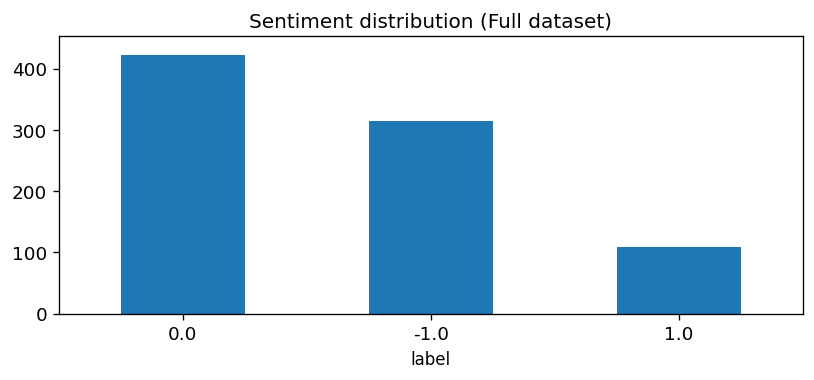

In [13]:
# Exercise 7

# We want to look at the distribution of sentiment labels in both the full dataset (df) and the sample (df_sample). 
# This will let us see if the sample is representative.

# First, we check the label distribution in the full dataset:
print(df['label'].value_counts())

# Plot bar chart for df (full dataset)
df['label'].value_counts().plot(
    kind='bar',
    title='Sentiment distribution (Full dataset)',
    ylim=[0, df['label'].value_counts().max() + 30],  # automated ylim
    rot=0, fontsize=11, figsize=(8,3)
)


label
-1.0    42
 0.0    40
 1.0    18
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (Sample)'}, xlabel='label'>

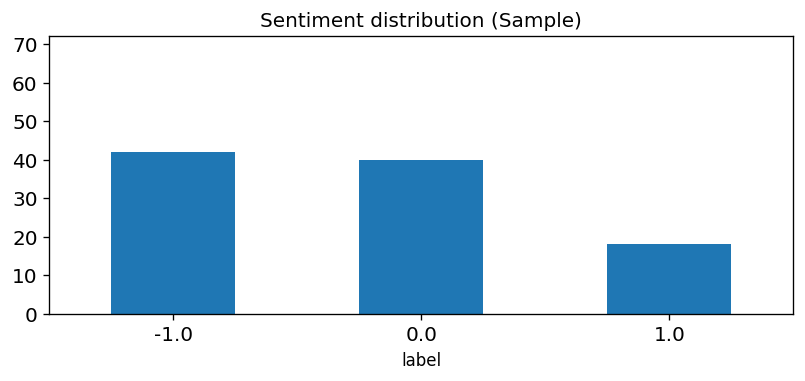

In [14]:
# Then, do the same for the sample:
print(df_sample['label'].value_counts())

df_sample['label'].value_counts().plot(
    kind='bar',
    title='Sentiment distribution (Sample)',
    ylim=[0, df_sample['label'].value_counts().max() + 30],  # automated ylim
    rot=0, fontsize=12, figsize=(8,3)
)


In the full dataset, we can see the overall counts of positive (1.0), neutral (0.0), and negative (-1.0). In the sample, the distribution should look similar but not identical, since it was randomly chosen. The key improvement is that we automated the ylim using .max() + 30, instead of hardcoding it. his makes the visualization adjust automatically if the dataset changes.

<Axes: title={'center': 'Sentiment distribution (Full vs Sample)'}, xlabel='label'>

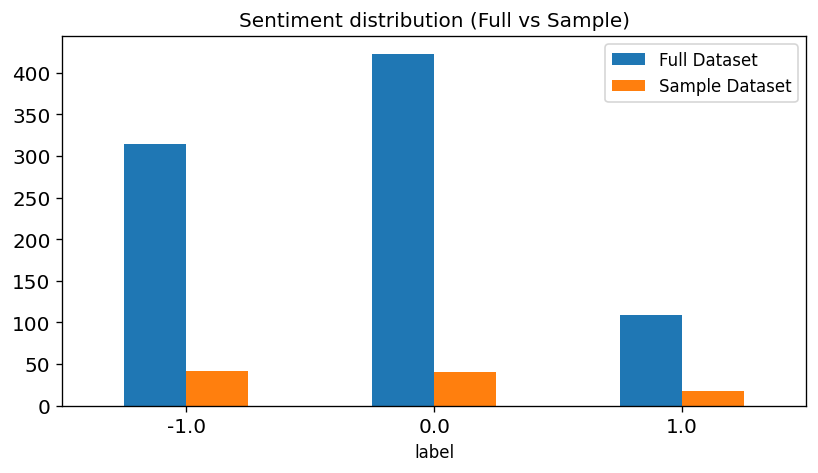

In [15]:
# Exercise 8 

# We want to do a side-by-side comparison of the distribution between the full dataset (df) and the sample (df_sample).

order = [-1.0, 0.0, 1.0]   # -1 = negative, 0 = neutral, 1 = positive

# Create a comparison DataFrame with both distributions
compare_df = pd.DataFrame({
    'Full Dataset': df['label'].value_counts(),
    'Sample Dataset': df_sample['label'].value_counts()
}).reindex(order)

# Plot them side by side
compare_df.plot(
    kind='bar',
    title='Sentiment distribution (Full vs Sample)',
    rot=0, fontsize=12, figsize=(8,4)
)

In [16]:
# Exercise 9

import nltk
nltk.download("punkt")

# Tokenize each text into unigrams (single words)
# This means we split each sentence into smaller units (words, emails, etc.)
df['unigrams'] = df['text'].apply(lambda x: nltk.word_tokenize(str(x)))

# Show first 4 rows with unigrams added
df[["text", "unigrams"]].head(4)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   
3  Vision Marine Technologies Inc. is rewriting t...   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# make a vectorizer
count_vect = CountVectorizer()

# get the analyzer function so we can run it on any string
analyze = count_vect.build_analyzer()

In [18]:
first_idx = df['text'].first_valid_index()

tokens = analyze(str(df.loc[first_idx, 'text']))

# print tokens + how many we got 
print(tokens)
print("token count:", len(tokens))

['calls', 'on', 'retards']
token count: 3


In [23]:
analyze(df["text"].iloc[0])

['calls', 'on', 'retards']

In [24]:
X_counts = count_vect.fit_transform(df['text'].astype(str))

In [25]:
# Exercise 10

# First check the shape of the term-document matrix
print(X_counts.shape)


(847, 4346)


In [26]:
# look at first 5 docs against first 100 terms (dense slice)
print(X_counts[0:5, 0:100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

In [27]:
# Get vocabulary (all terms)
feature_names = count_vect.get_feature_names_out()

In [28]:
row_idx = 4

# Step 6: Find which columns in this row are nonzero (the words that appear)
nonzero_indices = X_counts[row_idx].nonzero()[1]

# Step 7: Map those column indices back to actual words
words_in_row5 = [feature_names[i] for i in nonzero_indices]

print("Words in row 5:", words_in_row5)

Words in row 5: ['he', 'didn', 'say', 'thank', 'you']


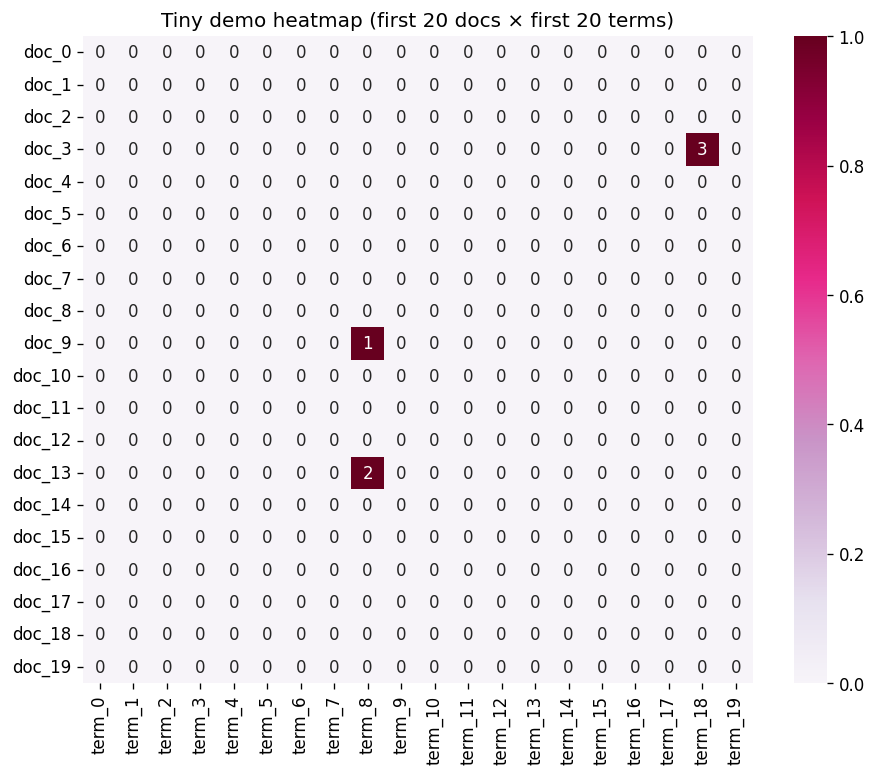

In [29]:
# Exercise 11 

# Part A: Tiny demo heatmap (first 20 docs × first 20 terms) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We reuse the fitted vectorizer + matrix from Exercise 10:
# count_vect: has the learned vocabulary
# X_counts: sparse matrix (rows = docs, cols = terms, values = counts)

# we the first 20 feature names (terms) just for a small, readable demo
terms_20 = count_vect.get_feature_names_out()[0:20]

plot_x = [f"term_{i}" for i in range(20)]

docs_20_idx = list(df.index)[0:20]
plot_y = [f"doc_{i}" for i in docs_20_idx]

# we slice the sparse matrix: first 20 docs × first 20 terms, then convert to dense array
plot_z = X_counts[0:20, 0:20].toarray()

# we put it into a DataFrame so seaborn can draw it easily
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# we then draw the tiny heatmap 
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
ax.set_title("Tiny demo heatmap (first 20 docs × first 20 terms)")
plt.show()

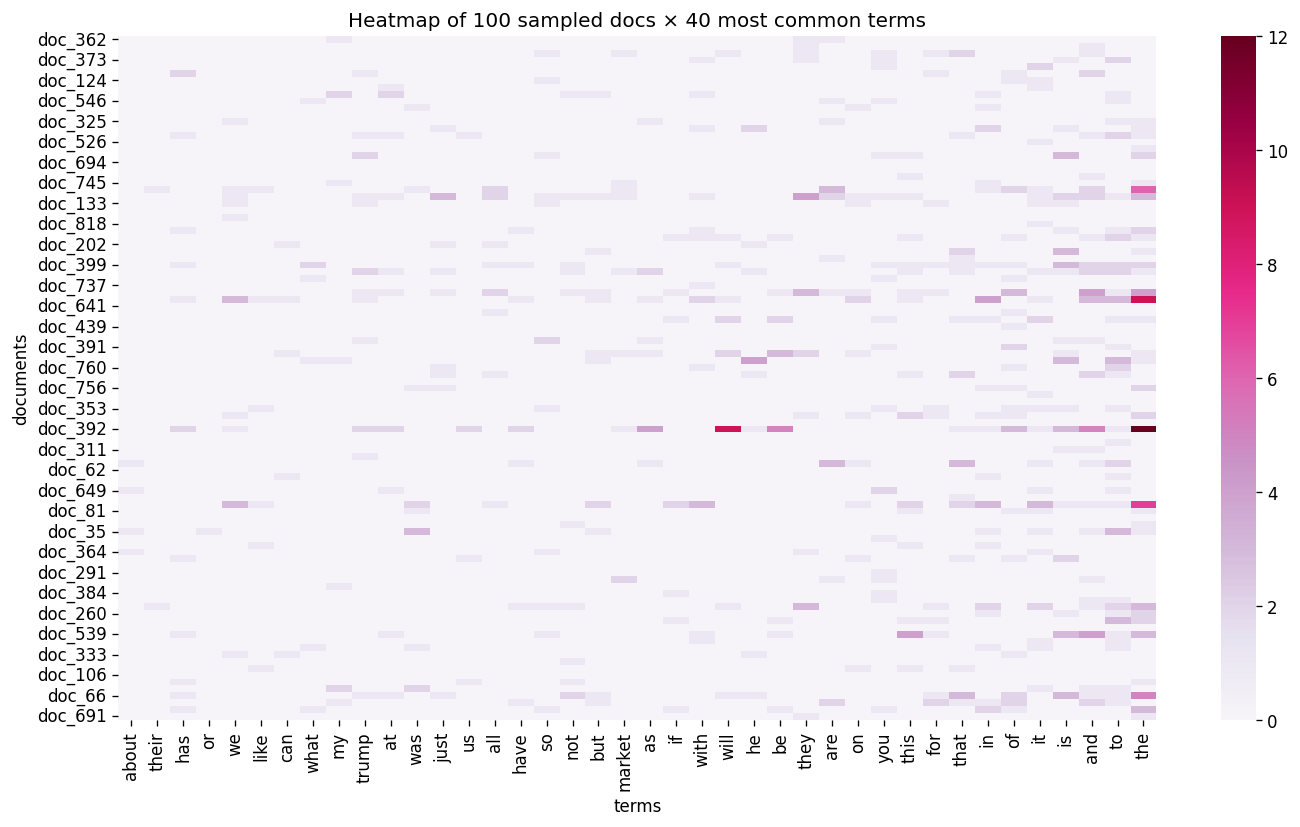

In [30]:
# Part B: Practical heatmap (sample docs × most-common terms)

# Plotting the FULL matrix is not helpful (too big + mostly zeros).
# Strategy:
#   - pick M random documents
#   - pick K most frequent terms (across the whole corpus)
#   - slice to M×K and plot
# This keeps it readable + fast, but still informative.

import numpy as np

M = 100  # how many documents to sample
K = 40   # how many top terms to keep

# we andomly choose M row indices from our matrix
rng = np.random.default_rng(42)
doc_idx = rng.choice(X_counts.shape[0], size=min(M, X_counts.shape[0]), replace=False)

# we find the top-K terms by total frequency 
term_totals = np.asarray(X_counts.sum(axis=0)).ravel()  
top_term_idx = np.argsort(term_totals)[-K:]             

# we then slice the sparse matrix (docs × top terms) and convert to dense
sub = X_counts[doc_idx][:, top_term_idx].toarray()

# build readable labels
feature_names = count_vect.get_feature_names_out()
top_terms = [feature_names[j] for j in top_term_idx]
doc_labels = [f"doc_{i}" for i in doc_idx]

# put into a DataFrame for seaborn
df_sub = pd.DataFrame(sub, index=doc_labels, columns=top_terms)

# draw the heatmap 
plt.figure(figsize=(12, 7))
ax = sns.heatmap(df_sub, cmap="PuRd")
ax.set_title(f"Heatmap of {len(doc_idx)} sampled docs × {len(top_terms)} most common terms")
ax.set_xlabel("terms")
ax.set_ylabel("documents")
plt.tight_layout()
plt.show()


In [31]:
# Exercise 12

import numpy as np
import pandas as pd
import plotly.express as px

# compute term frequencies (how often each word appears across all texts)
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

# get all the terms (the words in the vocabulary)
terms = count_vect.get_feature_names_out()

# put them into a DataFrame for easier handling
freq_df = (
    pd.DataFrame({"term": terms, "frequency": term_frequencies})
      .sort_values("frequency", ascending=False)  # sort by frequency (most common words first)
      .head(300)                                  # only keep the top 300 words (otherwise too messy)
      .reset_index(drop=True)
)

# shorten very long words so labels don’t overlap in the chart
def short(s, n=28): 
    return s if len(s) <= n else s[:n-1] + "…"
freq_df["label"] = freq_df["term"].map(short)

# lock the y-axis order so the most frequent term shows at the top
order = freq_df["label"].tolist()[::-1]  

# make the bar chart with Plotly
fig = px.bar(
    freq_df,
    y="label", 
    x="frequency",
    orientation="h",                 
    text="frequency",                
    color="frequency",               
    color_continuous_scale="PuBuGn", 
    title="Top 300 Word Frequencies"
)

# adjust details of the chart to make it clearer
fig.update_traces(
    textposition="outside",
    cliponaxis=False,
    customdata=freq_df["term"],      # hover shows the full word if shortened
    hovertemplate="<b>%{customdata}</b><br>count=%{x}<extra></extra>"
)

pad = freq_df["frequency"].iloc[0] * 0.15
fig.update_layout(
    yaxis=dict(
        categoryorder="array",
        categoryarray=order,
        automargin=True
    ),
    xaxis=dict(range=[0, freq_df["frequency"].max() + pad], title="Frequency"),
    margin=dict(l=180, r=40, t=70, b=40),
    height=max(1400, int(len(freq_df)*20))
)

fig.update_coloraxes(showscale=False)
fig.show()


In this step, I wanted to see which words show up most often in the dataset. To do this, I first summed across the whole term-document matrix to count how many times each word appears. Since the dataset has too many words, I only kept the top 300 most frequent ones to make the chart readable. I also switched the chart to a horizontal bar chart so the word labels don’t overlap. Long words were shortened in the chart, but I kept the full words available on hover. Finally, I used colors to show differences in frequency. This makes it easy to quickly see which words dominate in the dataset, without the chart getting messy.

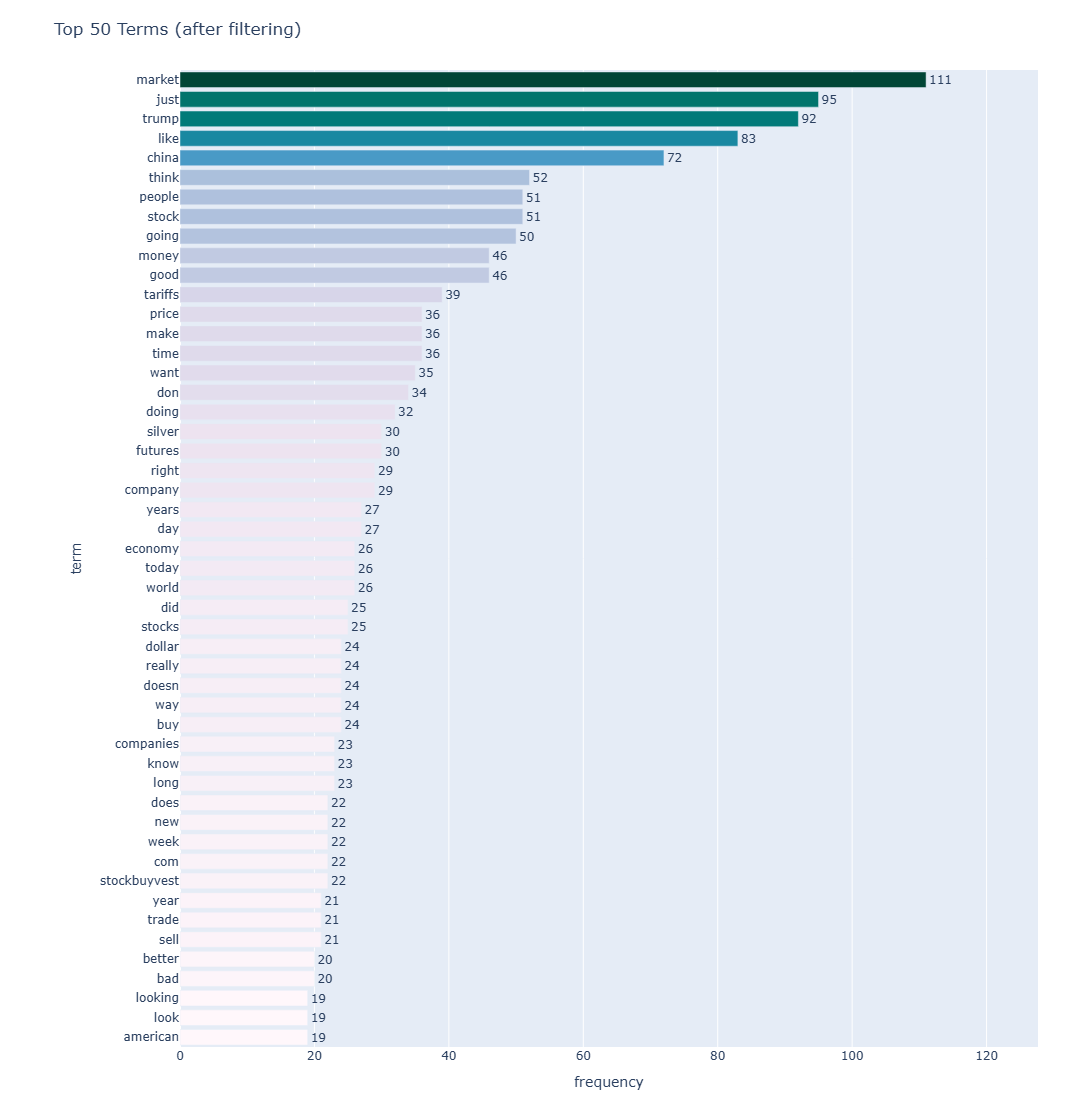

In [32]:
# Exercise 13
# Reduce the vocabulary before plotting 

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Plotting “everything” is slow + messy so its better to filter the vocabulary to keep only useful tokens.

# small knobs to be able to tweak control
TOP_N   = 50   # show only the top 50 most informative terms
MIN_DF  = 5    # a term must appear in at least 5 documents
MIN_LEN = 3    # ignore super short tokens (e.g., "a", "I")
MAX_LEN = 20   # ignore overly long tokens (likely noise)

# compute term stats: total frequency (tf) and document frequency (df)
terms = count_vect.get_feature_names_out()
tf = np.asarray(X_counts.sum(axis=0)).ravel()      
dfreq = (X_counts > 0).sum(axis=0).A1              

freqs = pd.DataFrame({"term": terms, "tf": tf, "df": dfreq})

# filter out junk: stopwords, too short/long, numeric, path-like stuff, etc.
stop = set(ENGLISH_STOP_WORDS)

def is_valid_term(t):
    # keep normal-looking words only
    if not (MIN_LEN <= len(t) <= MAX_LEN):   # drop too short/long
        return False
    if t in stop:                            # drop stopwords like "the", "and"
        return False
    if any(ch in t for ch in "@/#\\|"):      # drop emails/paths/tickers with slashes
        return False
    if t.isnumeric():                        # drop pure numbers
        return False
    return t.isalpha()                       # keep only alphabetic tokens (no punctuation)

freqs = freqs[freqs["term"].map(is_valid_term)]   
freqs = freqs[freqs["df"] >= MIN_DF]              

# pick the top N by total frequency (after filtering)
top = freqs.sort_values("tf", ascending=False).head(TOP_N).copy()

# shorten long labels so bars don’t overlap (full term still shown on hover)
def short_label(s, n=28):
    return s if len(s) <= n else s[:n-1] + "…"

top["label"] = top["term"].map(short_label)

# make a clean horizontal bar chart
order = top["label"].tolist()[::-1]  # reverse so the biggest bar shows at the top

fig = px.bar(
    top,
    y="label",
    x="tf",
    orientation="h",                       
    text="tf",                             
    color="tf",                            
    color_continuous_scale="PuBuGn",
    title=f"Top {TOP_N} Terms (after filtering)"
)

# pretty hover + spacing
fig.update_traces(
    textposition="outside",
    cliponaxis=False,
    customdata=top["term"],
    hovertemplate="<b>%{customdata}</b><br>count=%{x}<extra></extra>"
)

pad = max(1, top["tf"].iloc[0] * 0.15)
fig.update_layout(
    yaxis=dict(categoryorder="array", categoryarray=order, automargin=True, title="term"),
    xaxis=dict(range=[0, top["tf"].max() + pad], title="frequency"),
    margin=dict(l=180, r=40, t=70, b=40),
    height=max(650, int(len(top) * 22))
)

fig.update_coloraxes(showscale=False)
fig.show()


I first computed tf and df for every word (how often it appears, and in how many docs).Then filtered out unhelpful tokens (stopwords, super short/long, numeric, weird symbols, too rare). From the cleaned list, I picked the Top 50 by total frequency and plotted them. The result is an uncluttered, faster chart that focuses on words that actually carry information in your new dataset.

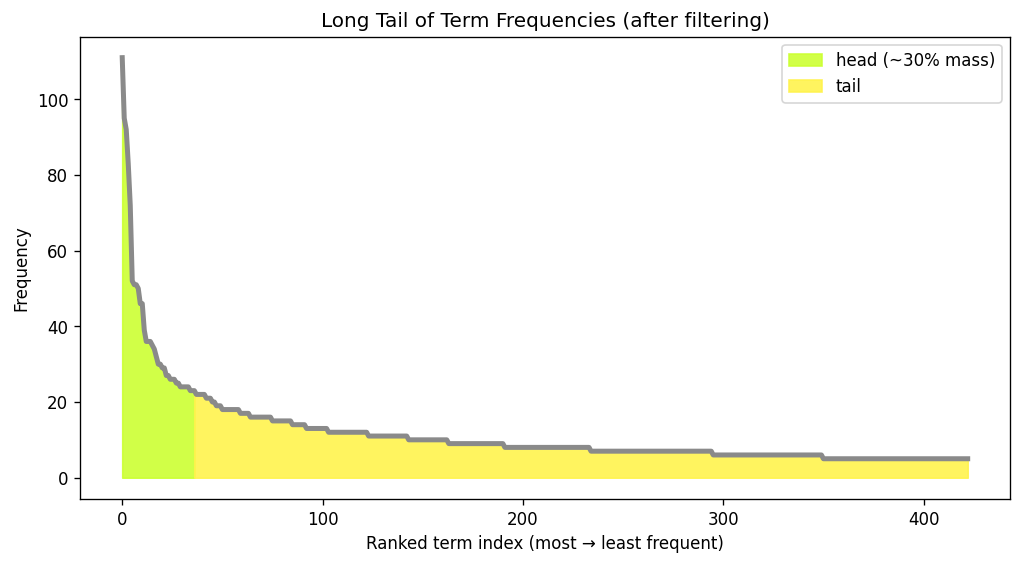

In [33]:
# Exercise 14 
import numpy as np
import matplotlib.pyplot as plt

# sort term frequencies high → low 
y = np.sort(freqs["tf"].to_numpy())[::-1]        
x = np.arange(len(y))                           

# split into "head" vs "tail" by cumulative mass (30% here)
HEAD_SHARE = 0.30
cum = np.cumsum(y); total = cum[-1]
head_end = int(np.searchsorted(cum, HEAD_SHARE * total))
head_end = max(1, min(head_end, len(y) - 1))

# plot the long tail
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, color="#8a8a8a", linewidth=3)  # gray main curve

# fill head in green
ax.fill_between(x[:head_end+1], y[:head_end+1],
                color="#ccff33", alpha=0.9, label="head (~30% mass)")
# fill tail in yellow
ax.fill_between(x[head_end:], y[head_end:],
                color="#fff34d", alpha=0.9, label="tail")

ax.set_title("Long Tail of Term Frequencies (after filtering)")
ax.set_xlabel("Ranked term index (most → least frequent)")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()


We cleaned the vocabulary (remove stopwords, too-short/long tokens, numeric junk, and super-rare words). The we sorted all remaining terms by frequency to get a ranked list (most common → least common). The plot shows the classic long tail: a few terms make up a big chunk of all counts (green “head”), and many terms appear rarely (yellow “tail”).

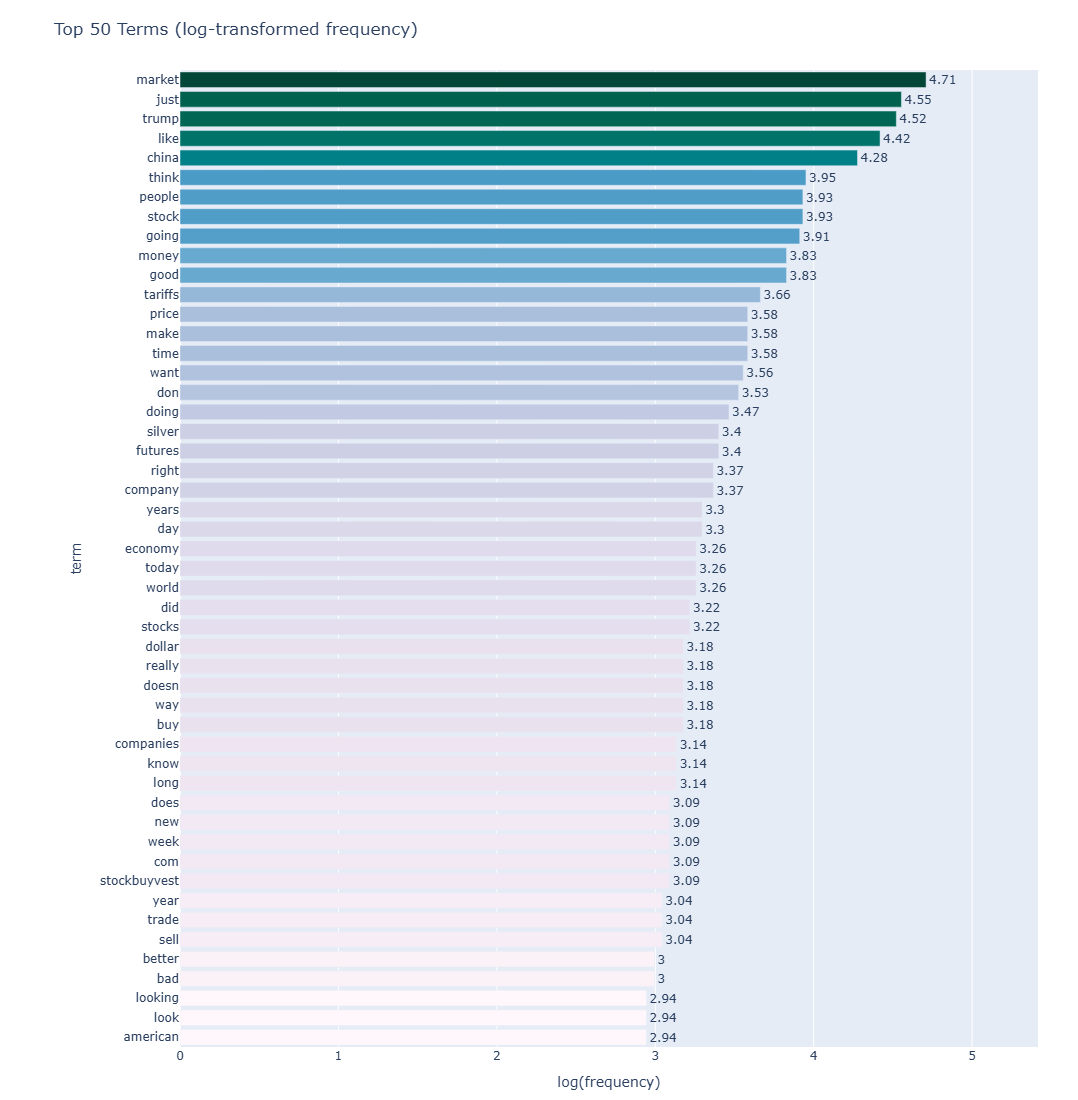

In [34]:
# Exercise 15 

freqs_log = freqs.copy()

# apply log to frequencies (clip at 1 to avoid log(0))
import numpy as np
freqs_log["tf_log"] = np.log(freqs_log["tf"].clip(lower=1))

# pick top-N by log frequency
top_log = freqs_log.sort_values("tf_log", ascending=False).head(TOP_N).copy()

def short_label(s, n=28):
    return s if len(s) <= n else s[:n-1] + "…"
top_log["label"] = top_log["term"].map(short_label)

import plotly.express as px
order = top_log["label"].tolist()[::-1]

fig = px.bar(
    top_log,
    y="label",
    x="tf_log",                 # ← changed to log freq
    orientation="h",
    text=top_log["tf_log"].round(2),
    color="tf_log",
    color_continuous_scale="PuBuGn",
    title=f"Top {TOP_N} Terms (log-transformed frequency)"
)

fig.update_traces(
    textposition="outside",
    cliponaxis=False,
    customdata=top_log["term"],
    hovertemplate="<b>%{customdata}</b><br>log(count)=%{x:.2f}<extra></extra>"
)

pad = max(0.2, top_log["tf_log"].iloc[0] * 0.15)
fig.update_layout(
    yaxis=dict(categoryorder="array", categoryarray=order, automargin=True, title="term"),
    xaxis=dict(range=[0, top_log["tf_log"].max() + pad], title="log(frequency)"),
    margin=dict(l=180, r=40, t=70, b=40),
    height=max(650, int(len(top_log) * 22))
)

fig.update_coloraxes(showscale=False)
fig.show()


In [35]:
# MEANINGFUL NEW DATA VIZUALIZATION
# DATA PREPARATION
# COMPLETE DATA PREPARATION - Run this first!
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

print("📊 Preparing data for all visualizations...")

# Get the basic frequency data from your original exercise
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()

# Create our main dataframe
freq_df = pd.DataFrame({
    "term": terms, 
    "frequency": term_frequencies,
    "doc_frequency": np.asarray((X_counts > 0).sum(axis=0)).ravel()
}).sort_values("frequency", ascending=False)

# Create top_words for detailed analysis (top 100 words)
top_words = freq_df.head(100).copy()
top_words['rank'] = range(1, len(top_words) + 1)
top_words['zipf_predicted'] = top_words['frequency'].iloc[0] / top_words['rank']

# Calculate word length statistics
top_words['length'] = top_words['term'].str.len()
length_stats = top_words.groupby('length').agg({
    'frequency': 'sum',
    'term': 'count'
}).reset_index()
length_stats.columns = ['word_length', 'total_frequency', 'word_count']

# Create semantic categories
def categorize_word(word):
    word = word.lower()
    if any(suffix in word for suffix in ['ing', 'ed', 'ly']):
        return 'Verb/Adverb Forms'
    elif any(suffix in word for suffix in ['tion', 'ment', 'ness', 'ity']):
        return 'Abstract Nouns' 
    elif any(suffix in word for suffix in ['s', 'es']) and not word.endswith('ss'):
        return 'Plurals'
    elif re.match(r'^[a-z]{1,3}$', word):
        return 'Short Words'
    elif any(char.isdigit() for char in word):
        return 'Numbers/Mixed'
    else:
        return 'Other Nouns/Adjectives'

top_words['category'] = top_words['term'].apply(categorize_word)
category_stats = top_words.groupby('category').agg({
    'frequency': 'sum',
    'term': 'count'
}).reset_index()

# Prepare vocabulary coverage data
top_words_sorted = top_words.sort_values('frequency', ascending=True)
top_words_sorted['cumulative_percentage'] = top_words_sorted['frequency'].cumsum() / top_words_sorted['frequency'].sum() * 100

print("✅ All data prepared! Now you can run each visualization separately.")
print(f"• Total unique words: {len(freq_df):,}")
print(f"• Top word: '{top_words['term'].iloc[0]}' ({top_words['frequency'].iloc[0]:,} occurrences)")
print(f"• Average word length: {top_words['length'].mean():.1f} characters")

📊 Preparing data for all visualizations...
✅ All data prepared! Now you can run each visualization separately.
• Total unique words: 4,346
• Top word: 'the' (920 occurrences)
• Average word length: 3.7 characters



🎯 VISUALIZATION 1: Word Popularity vs Spread Analysis
   This answers: Are common words used everywhere, or just spammed in a few documents?


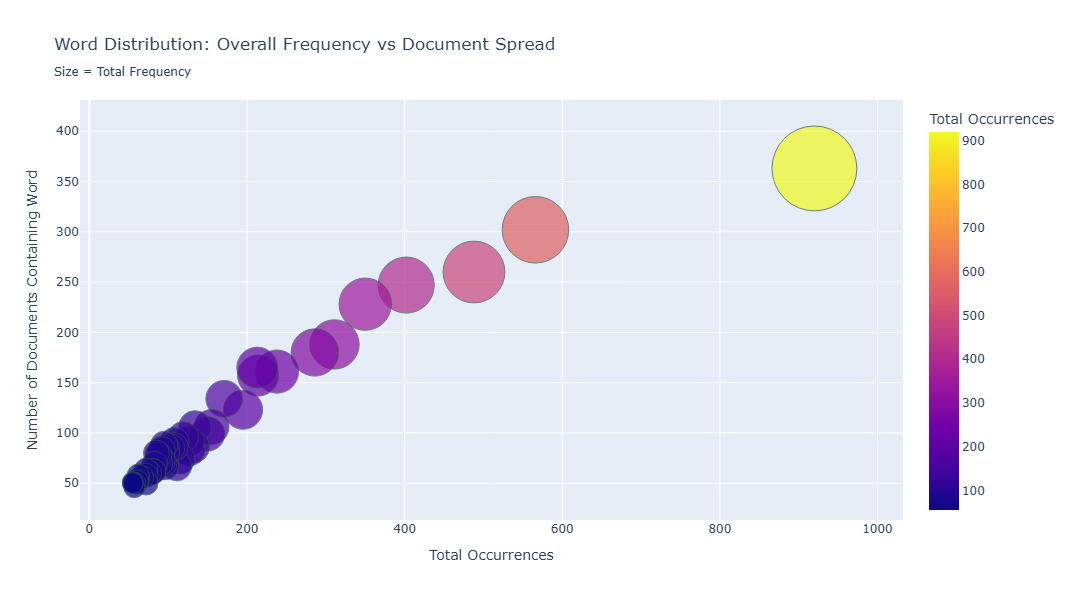


• Top-right bubbles = Common words! Used everywhere, all the time (probably main topics)
• Bottom-right bubbles = "Spammy" words - used a lot but only in few documents
• Top-left bubbles = "Background" words - appear in many docs but not frequently
• This shows if our vocabulary is balanced or dominated by a few words!



In [36]:
# 1. BUBBLE CHART: Frequency vs Document Spread
print("\n🎯 VISUALIZATION 1: Word Popularity vs Spread Analysis")
print("   This answers: Are common words used everywhere, or just spammed in a few documents?")

fig1 = px.scatter(
    top_words.head(50),
    x="frequency",           # Total times word appears
    y="doc_frequency",       # How many documents it appears in  
    size="frequency",        # Bubble size = overall popularity
    color="frequency",       
    hover_name="term",
    size_max=60,
    title="Word Distribution: Overall Frequency vs Document Spread<br><sub>Size = Total Frequency</sub>",
    labels={"frequency": "Total Occurrences", "doc_frequency": "Number of Documents Containing Word"}
)

fig1.update_traces(
    marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')),
    hovertemplate="<b>%{hovertext}</b><br>Total occurrences: %{x}<br>Documents: %{y}<extra></extra>"
)

fig1.update_layout(height=600, showlegend=False)
fig1.show()

print("""
• Top-right bubbles = Common words! Used everywhere, all the time (probably main topics)
• Bottom-right bubbles = "Spammy" words - used a lot but only in few documents
• Top-left bubbles = "Background" words - appear in many docs but not frequently
• This shows if our vocabulary is balanced or dominated by a few words!
""")


=== VISUALIZATION 2: Zipf's Law Verification ===
This tests if our text follows the famous 'rank vs frequency' pattern found in most languages


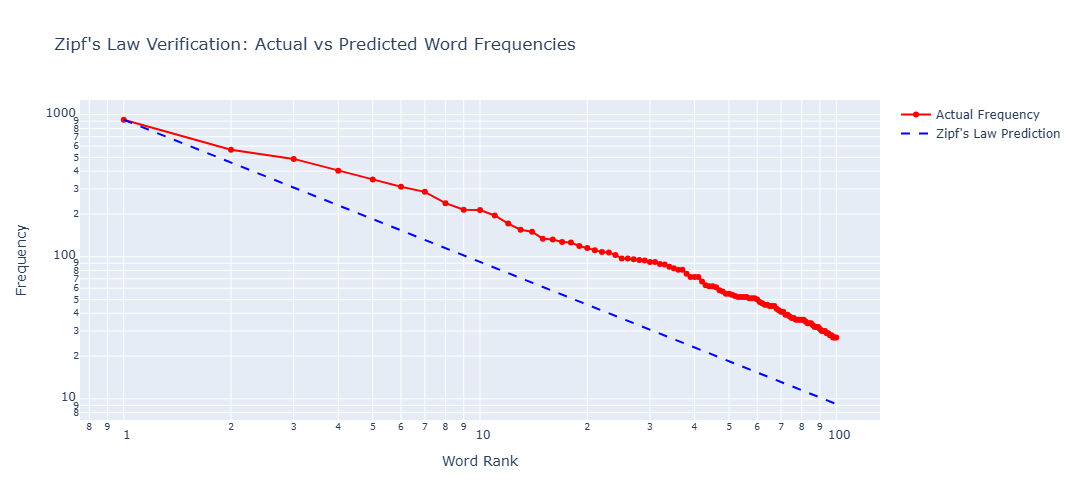

In [37]:
# 2. ZIPF'S LAW VISUALIZATION
print("\n=== VISUALIZATION 2: Zipf's Law Verification ===")
print("This tests if our text follows the famous 'rank vs frequency' pattern found in most languages")

fig2 = go.Figure()

# Actual frequencies
fig2.add_trace(go.Scatter(
    x=top_words['rank'],
    y=top_words['frequency'],
    mode='lines+markers',
    name='Actual Frequency',
    line=dict(color='red', width=2)
))

# Zipf's law prediction
fig2.add_trace(go.Scatter(
    x=top_words['rank'],
    y=top_words['zipf_predicted'],
    mode='lines',
    name="Zipf's Law Prediction",
    line=dict(color='blue', width=2, dash='dash')
))

fig2.update_layout(
    title="Zipf's Law Verification: Actual vs Predicted Word Frequencies",
    xaxis_title="Word Rank",
    yaxis_title="Frequency",
    yaxis_type="log",  # Using log scale to see the pattern clearly
    xaxis_type="log",  
    height=500
)

fig2.show()


 VISUALIZATION 3: Word Length Patterns
 Analyzing how word length correlates with usage


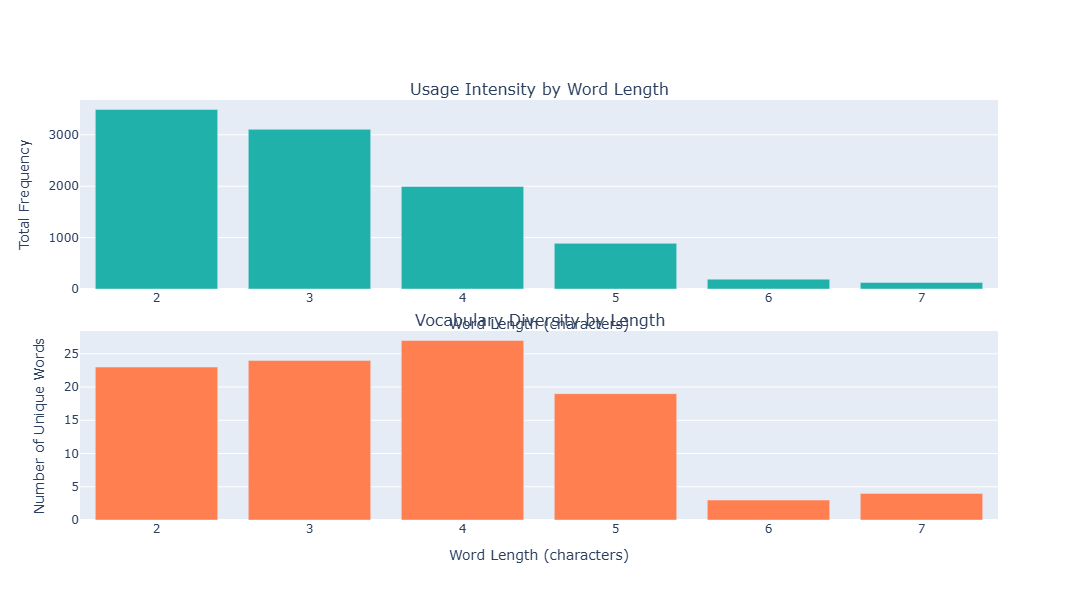



This shows the "architectural blueprint" of our vocabulary from two perspectives:

TOP CHART - "USAGE INTENSITY":
• Which word lengths DOMINATE the actual text
• What length of words do we USE the most?

BOTTOM CHART - "VOCABULARY DIVERSITY":  
• How many UNIQUE words we have at each length
• How RICH is our vocabulary at different lengths?




In [38]:
print("\n VISUALIZATION 3: Word Length Patterns")
print(" Analyzing how word length correlates with usage")

fig3 = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Usage Intensity by Word Length', 'Vocabulary Diversity by Length'),
    vertical_spacing=0.1
)

fig3.add_trace(
    go.Bar(x=length_stats['word_length'], y=length_stats['total_frequency'],
           name='Total Frequency', marker_color='lightseagreen'),
    row=1, col=1
)
fig3.add_trace(
    go.Bar(x=length_stats['word_length'], y=length_stats['word_count'],
           name='Number of Words', marker_color='coral'),
    row=2, col=1
)

fig3.update_layout(height=600, showlegend=False)
fig3.update_xaxes(title_text="Word Length (characters)", row=2, col=1)
fig3.update_xaxes(title_text="Word Length (characters)", row=1, col=1)
fig3.update_yaxes(title_text="Total Frequency", row=1, col=1)
fig3.update_yaxes(title_text="Number of Unique Words", row=2, col=1)
fig3.show()

print("""

This shows the "architectural blueprint" of our vocabulary from two perspectives:

TOP CHART - "USAGE INTENSITY":
• Which word lengths DOMINATE the actual text
• What length of words do we USE the most?

BOTTOM CHART - "VOCABULARY DIVERSITY":  
• How many UNIQUE words we have at each length
• How RICH is our vocabulary at different lengths?

""")

VISUALIZATION 4: Semantic Category Breakdown
   Understanding what TYPES of words dominate our text


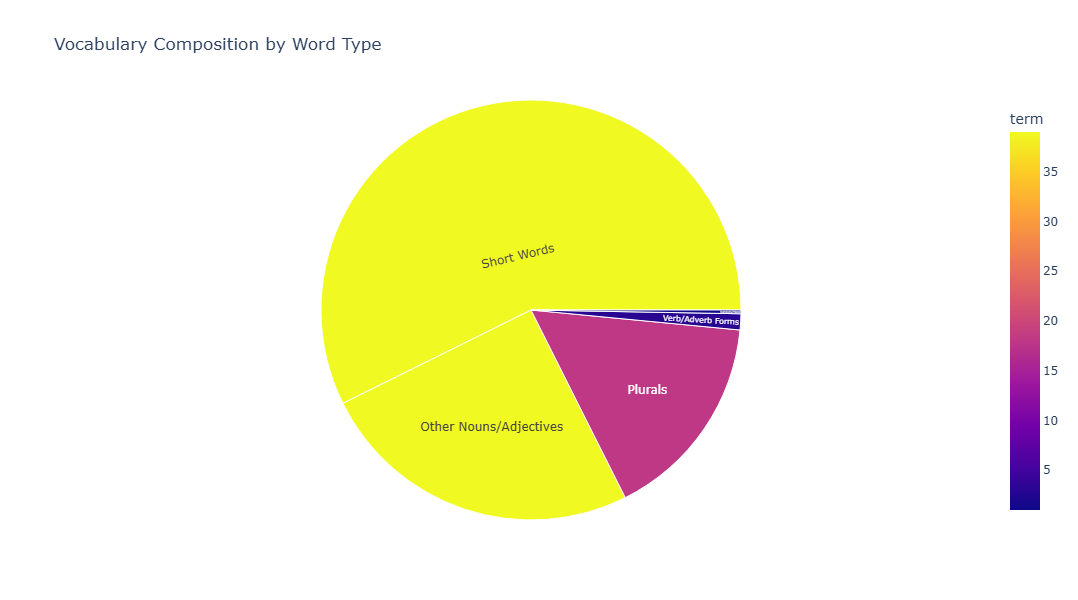


This is a "linguistic personality test" for our text that answers:
• What KIND of language are we using?
• What's the composition of our vocabulary?

HOW TO READ:
• Segment SIZE = percentage of total word usage
• Segment COLOR = vocabulary richness (darker = more unique words)



In [39]:
print("VISUALIZATION 4: Semantic Category Breakdown")
print("   Understanding what TYPES of words dominate our text")

fig4 = px.sunburst(
    category_stats,
    path=['category'],
    values='frequency',
    color='term',
    title="Vocabulary Composition by Word Type"
)
fig4.update_layout(height=600)
fig4.show()

print("""
This is a "linguistic personality test" for our text that answers:
• What KIND of language are we using?
• What's the composition of our vocabulary?

HOW TO READ:
• Segment SIZE = percentage of total word usage
• Segment COLOR = vocabulary richness (darker = more unique words)
""")

# Phase 2

In [40]:
### Begin Assignment Here

#SETUP

import os, re, time, builtins, math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams["figure.dpi"] = 120


In [41]:
# Sanity check : ensure Phase 1 objects exist (X with label_name) and build a global TDM

assert {"text","label_name"}.issubset(X.columns), "Run your Phase 1 cell that creates X['label_name'] first."

count_vect = CountVectorizer(
    lowercase=True,
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",  # alphabetic tokens only
    min_df=2                                     # drop ultra-rare noise
)
X_counts = count_vect.fit_transform(X["text"].astype(str))
terms = count_vect.get_feature_names_out()
tdm_df = pd.DataFrame(X_counts.toarray(), columns=terms, index=X.index)

print("Global TDM shape:", tdm_df.shape)
print(X["label_name"].value_counts())


Global TDM shape: (847, 1662)
label_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


In [42]:
# Split corpus into sentiment classes for class-specific pattern mining
categories = X["label_name"].unique()

def make_tdm_for_subset(df_subset):
    vec = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b", min_df=2)
    m = vec.fit_transform(df_subset["text"].astype(str))
    return pd.DataFrame(m.toarray(), columns=vec.get_feature_names_out())

filt_term_document_dfs = {c: make_tdm_for_subset(X[X["label_name"]==c]) for c in categories}
{c: d.shape for c, d in filt_term_document_dfs.items()}


{'negative': (315, 780), 'neutral': (423, 930), 'positive': (109, 317)}

In [43]:
# Choose which category to look at (0=negative, 1=neutral, 2=positive for example)
category_number = 0  # <- change this to 1 or 2 to inspect others

print(f"Filtered Term-Document Frequency DataFrame for Category '{categories[category_number]}':")
filt_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category 'negative':


about  absolutely  actual  actually  admin  administration  affect  \
0        0           0       0         0      0               0       0   
1        0           0       0         0      0               0       0   
2        0           0       0         0      0               0       0   
3        0           0       0         0      0               0       0   
4        0           0       0         0      0               0       0   
..     ...         ...     ...       ...    ...             ...     ...   
310      0           0       0         0      0               0       0   
311      0           0       0         0      0               0       0   
312      0           0       0         0      0               0       0   
313      0           0       0         0      0               0       0   
314      0           0       0         0      0               0       0   

     after  again  ago  ...  xi  yeah  year  years  yet  yippee  yo  you  \
0        0      0    0  ...   0     0     0      0    0       0   0    0   
1        0      0    0  ...   0     0     0      0    0       0   0    1   
2        0      0    0  ...   0     0     0      0    0       0   0    0   
3        0      0    0  ...   0     0     0      0    0       0   0    0   
4        0      0    0  ...   0     0     0      0    0       0   0    0   
..     ...    ...  ...  ...  ..   ...   ...    ...  ...     ...  ..  ...   
310      0      0    0  ...   0     0     0      0    0       0   0    0   
311      0      0    0  ...   0     0     0      1    0       0   0    0   
312      0      0    0  ...   0     0     0      0    0       0   0    0   
313      0      0    0  ...   0     0     0      0    0       0   0    0   
314      0      0    0  ...   0     0     0      0    0       0   0    0   

     your  zero  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0  
..    ...   ...  
310     0     0  
311     0     0  
312     0     0  
313     0     0  
314     0     0  

[315 rows x 780 columns]

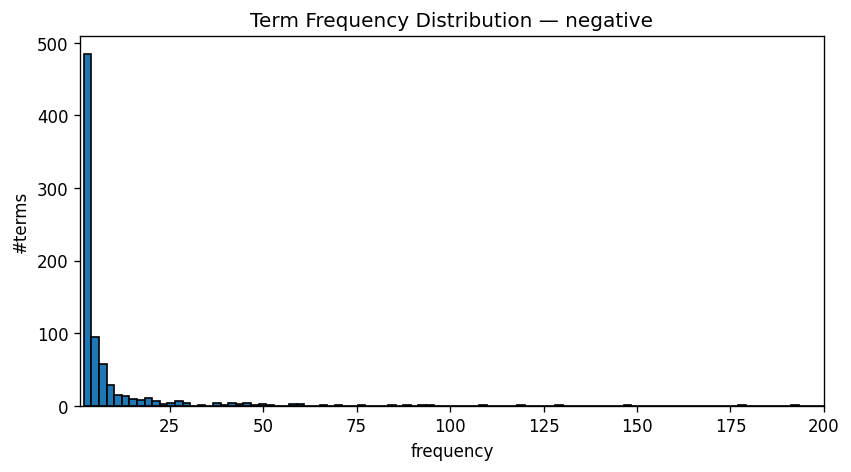

In [44]:
# Frequency histogram per class to motivate filtering

cname = categories[category_number]
word_counts = filt_term_document_dfs[cname].sum(axis=0).to_numpy()

plt.figure(figsize=(8,4))
plt.hist(word_counts, bins=200, edgecolor="black")
plt.title(f"Term Frequency Distribution — {cname}")
plt.xlabel("frequency"); plt.ylabel("#terms")
plt.xlim(1, min(200, int(word_counts.max())))
plt.show()


In [46]:
#  Explore the top 5% words in this category

category_number = 0  # You can change it from 0 to len(categories)-1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # indices
sorted_counts = np.sort(word_counts)[::-1]      # values

# Index cutoff for the top 5%
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Indices of the top 5%
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Terms in the top 5%
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name
                  for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms (top 5%): {filtered_words}")



Category: negative
Number of terms in top 5%: 39
Filtered terms (top 5%): ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'not', 'so', 'all', 'have', 'china', 'but', 'has', 'just', 'what', 'we', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'or', 'about']


In [47]:
sorted_counts      # frequencies sorted descending


array([409, 231, 193, 178, 147, 130, 118, 108,  95,  92,  89,  85,  77,
        70,  67,  60,  59,  57,  57,  52,  49,  49,  47,  46,  46,  45,
        44,  43,  41,  41,  41,  39,  38,  38,  38,  37,  34,  29,  29,
        29,  28,  28,  28,  28,  27,  27,  26,  25,  25,  25,  24,  24,
        22,  22,  21,  21,  21,  21,  20,  20,  20,  20,  20,  19,  19,
        19,  19,  19,  18,  18,  18,  18,  17,  17,  17,  17,  16,  16,
        16,  16,  16,  15,  15,  15,  15,  14,  14,  14,  14,  14,  14,
        14,  13,  13,  13,  13,  13,  13,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  11,  11,  11,  11,  11,  11,  10,  10,  10,  10,
        10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   

In [48]:
sorted_indices     # indices for words sorted descending

array([657, 678,  27, 346, 348, 464, 332, 656, 670, 302, 750, 246, 777,
        55,  35, 693, 663, 708, 469,  38, 460, 605,  11, 299, 111,  86,
       297, 356, 740, 732, 325, 754, 728,  42, 313,  94, 658, 475,   0,
       212, 374, 661, 492, 456, 441, 409, 434, 311, 659, 666, 463, 274,
       470, 432, 766, 320, 540, 403, 653, 480,  26, 184, 175, 477, 196,
       707, 646, 255,  90, 741, 266, 660, 608, 178, 746, 481, 686, 256,
       181,  59, 177, 580, 627, 748, 473,  29, 675,  57, 278, 479, 545,
       762,  46, 272, 504,  23, 770, 725, 440, 449, 378, 416, 587, 215,
       437, 778, 138, 179, 662,  17, 591,  48,   7, 709, 583, 203, 363,
       283, 347, 706, 465, 563, 153, 638, 307, 516, 665,   8, 645, 341,
        87,  22, 650, 731, 574, 581,  28, 723, 571, 734, 737, 124, 141,
       234, 610, 585, 258, 214, 252, 555, 213,  89, 664, 742,  77, 763,
       695, 639, 637,  24, 726, 682,   5, 360,  31,  32,  92,  62, 546,
        65,  18, 745, 373, 140, 182, 743, 462, 688, 243, 558, 32

In [49]:
filt_term_document_dfs[categories[category_number]].loc[:, 'the'].sum(axis=0)

409

In [51]:
# Explore the bottom 1% words in this category
category_number = 0  # You can change it from 0 to len(categories)-1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort ascending this time
sorted_indices = np.argsort(word_counts)         # indices ascending
sorted_counts = word_counts[sorted_indices]      # values ascending

# Index cutoff for bottom 1%
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Indices for bottom 1%
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Terms in bottom 1%
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name
                  for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms (bottom 1%): {filtered_words}")


Category: negative
Number of terms in bottom 1%: 7
Filtered terms (bottom 1%): ['looked', 'fall', 'fake', 'factory', 'exports', 'popular', 'expectations']


In [52]:
sorted_counts      # ascending

array([  2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

In [53]:
sorted_indices

array([389, 228, 227, 225, 223, 509, 221, 510, 503, 219, 217, 513, 514,
       515, 517, 523, 210, 512, 209, 499, 494, 486, 250, 249, 248, 247,
       487, 245, 498, 244, 242, 489, 240, 239, 490, 493, 236, 488, 483,
       207, 525, 554, 557, 560, 561, 564, 352, 173, 553, 566, 570, 168,
       572, 575, 164, 163, 162, 567, 206, 551, 548, 526, 527, 528, 529,
       530, 531, 532, 549, 535, 195, 194, 193, 537, 538, 539, 543, 536,
       253, 254, 478, 380, 381, 383, 384, 316, 387, 391, 379, 398, 401,
       310, 410, 306, 305, 304, 303, 399, 301, 322, 376, 345, 355, 357,
       359, 340, 364, 337, 377, 365, 334, 333, 366, 330, 329, 328, 372,
       335, 417, 419, 298, 450, 452, 455, 458, 459, 461, 265, 448, 264,
       262, 467, 260, 468, 471, 472, 474, 263, 447, 276, 444, 420, 296,
       421, 422, 423, 425, 291, 289, 427, 428, 286, 284, 430, 435, 436,
       438, 443, 161, 160, 174, 576,  63, 680, 681,  60, 683,  58, 684,
        56, 685, 687, 689,  52,  51,  50, 691,  64, 669, 668,  6

In [56]:
filt_term_document_dfs[categories[category_number]].loc[:, 'exports'].sum(axis=0)


2

In [57]:
# Filter out bottom 1% and top 5% per actegory
category_number = 0  # You can change it from 0 to len(categories)-1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Words to remove (bottom 1% + top 5%)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove, errors='ignore')

# Apply the filtering function to each category
term_document_dfs = {}
for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
looked          2
fall            2
fake            2
factory         2
exports         2
popular         2
expectations    2
dtype: int64
Top 5.0% words: 
about     29
or        29
their     34
can       37
his       38
at        38
was       38
with      39
if        41
we        41
what      41
just      43
has       44
but       45
china     46
have      46
all       47
so        49
not       49
as        52
on        57
us        57
they      59
trump     60
are       67
be        70
you       77
for       85
will      89
he        92
this      95
that     108
in       118
of       130
it       147
is       178
and      193
to       231
the      409
dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
yup            2
profit         2
simply         2
introduced     2
eow            2
site           2
environment    2
entire         2
enter          2
dtype: int64
Top 5.0% wo

absolutely  actual  actually  admin  administration  affect  after  \
0             0       0         0      0               0       0      0   
1             0       0         0      0               0       0      0   
2             0       0         0      0               0       0      0   
3             0       0         0      0               0       0      0   
4             0       0         0      0               0       0      0   
..          ...     ...       ...    ...             ...     ...    ...   
310           0       0         0      0               0       0      0   
311           0       0         0      0               0       0      0   
312           0       0         0      0               0       0      0   
313           0       0         0      0               0       0      0   
314           0       0         0      0               0       0      0   

     again  ago  agree  ...  wrong  xi  yeah  year  years  yet  yippee  yo  \
0        0    0      0  ...      0   0     0     0      0    0       0   0   
1        0    0      0  ...      0   0     0     0      0    0       0   0   
2        0    0      0  ...      0   0     0     0      0    0       0   0   
3        0    0      0  ...      0   0     0     0      0    0       0   0   
4        0    0      0  ...      0   0     0     0      0    0       0   0   
..     ...  ...    ...  ...    ...  ..   ...   ...    ...  ...     ...  ..   
310      0    0      0  ...      0   0     0     0      0    0       0   0   
311      0    0      0  ...      0   0     0     0      1    0       0   0   
312      0    0      0  ...      0   0     0     0      0    0       0   0   
313      0    0      0  ...      0   0     0     0      0    0       0   0   
314      0    0      0  ...      0   0     0     0      0    0       0   0   

     your  zero  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0  
..    ...   ...  
310     0     0  
311     0     0  
312     0     0  
313     0     0  
314     0     0  

[315 rows x 734 columns]

# Exercise 16

In [ ]:
# Exercise 16

Similarities:
- Top 5% often include very general words (functioning like stopwords in this corpus).
- Bottom 1% are typos/rare tokens/noise that appear once or twice.

Differences:
- 'positive' tends to keep optimistic finance verbs/adjectives (e.g., 'gain', 'beat', 'bullish').
- 'negative' keeps risk/concern vocabulary (e.g., 'drop', 'bearish', 'fraud').
- 'neutral' keeps descriptive/reporting language (e.g., 'report', 'release', 'announce').

Overall: removing extreme frequencies helps patterns reflect sentiment-specific language better.


In [58]:
# Convert each class TDM → Transactional CSV (PAMI)
# CSV encoding shim to avoid utf-8 decode errors
import builtins

_orig_open = open
def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs.setdefault('encoding', 'latin-1')   # Force Latin-1
        kwargs.setdefault('errors', 'ignore')      # Ignore bad characters
    return _orig_open(*args, **kwargs)

builtins.open = safe_open

# Try new PAMI path, else fallback to old
try:
    from PAMI.extras.convert.DF2DB import DF2DB
    _use_new = True
except Exception:
    from PAMI.extras.DF2DB import DenseFormatDF as db
    _use_new = False

import re

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace non-alphanumerics to avoid errors in file creation
    category_safe = re.sub(r'[^a-zA-Z0-9]+', '_', category)
    
    if _use_new:
        obj = DF2DB(term_document_dfs[category])
        obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
    else:
        obj = db.DenseFormatDF(term_document_dfs[category])
        obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)




=== Stats for: td_freq_db_negative.csv ===
Database size (total no of transactions) : 309
Number of items : 734
Minimum Transaction Size : 1
Average Transaction Size : 11.045307443365695
Maximum Transaction Size : 100
Standard Deviation Transaction Size : 11.235255090308966
Variance in Transaction Sizes : 126.64079771361325
Sparsity : 0.9849518972161231


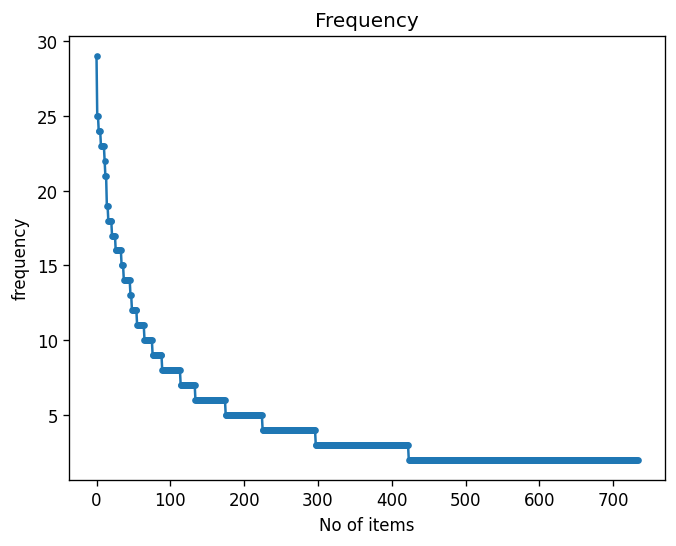

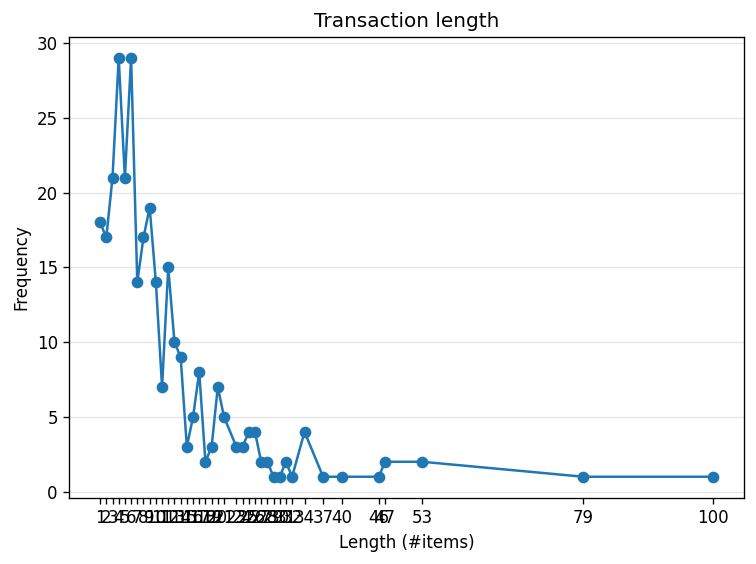


=== Stats for: td_freq_db_neutral.csv ===
Database size (total no of transactions) : 389
Number of items : 875
Minimum Transaction Size : 1
Average Transaction Size : 10.010282776349614
Maximum Transaction Size : 134
Standard Deviation Transaction Size : 14.50981042724854
Variance in Transaction Sizes : 211.07721357962527
Sparsity : 0.988559676827029


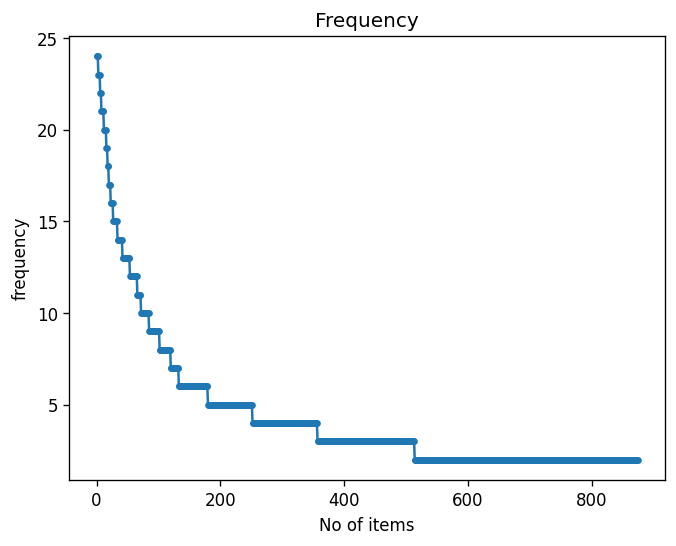

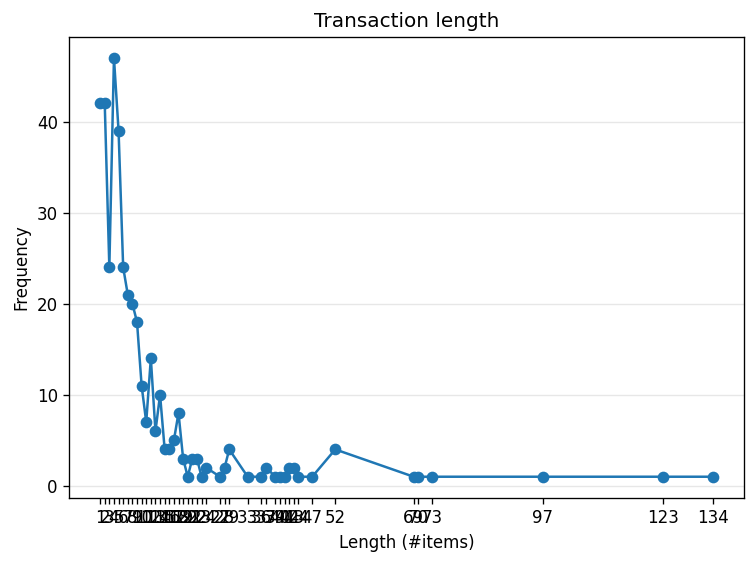


=== Stats for: td_freq_db_positive.csv ===
Database size (total no of transactions) : 106
Number of items : 299
Minimum Transaction Size : 1
Average Transaction Size : 9.726415094339623
Maximum Transaction Size : 44
Standard Deviation Transaction Size : 8.744305984379286
Variance in Transaction Sizes : 77.1911051212938
Sparsity : 0.9674701836309711


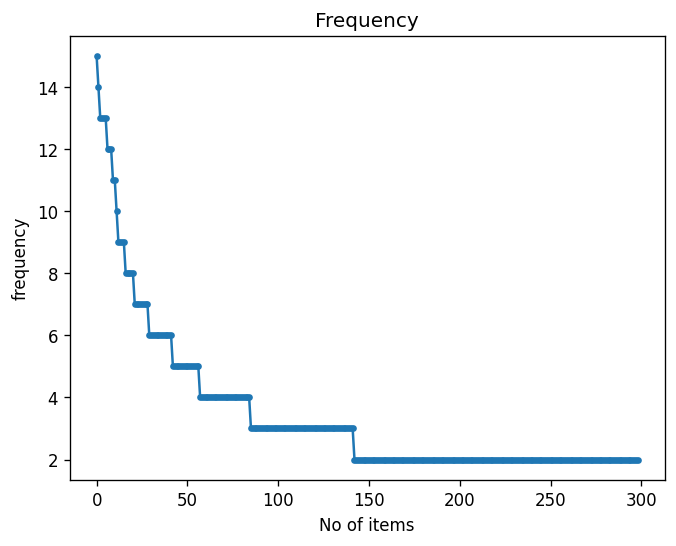

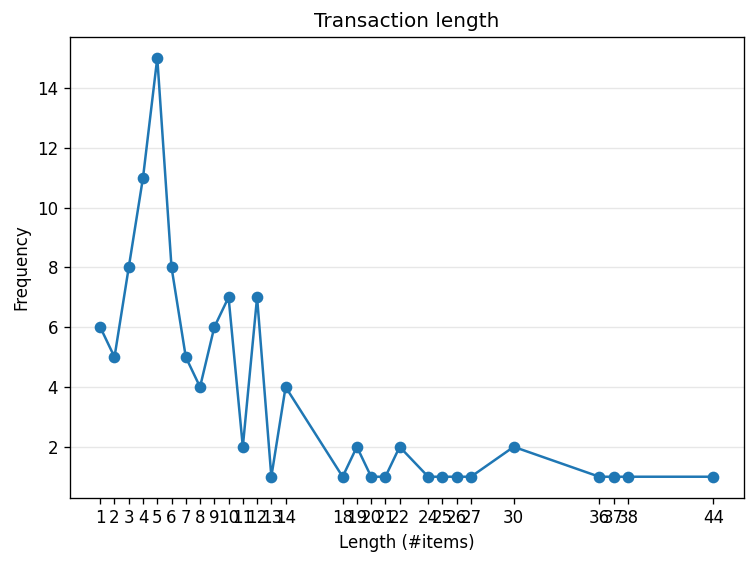

In [59]:
# DB stats & graphs
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in categories:
    category_safe = re.sub(r'[^a-zA-Z0-9]+', '_', category)
    dbfile = f'td_freq_db_{category_safe}.csv'
    print(f"\n=== Stats for: {dbfile} ===")
    obj = tds.TransactionalDatabase(dbfile)
    obj.run()
    obj.printStats()
    obj.plotGraphs()   


In [60]:
# Mine frequent patterns with FP-Growth (per class)

from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9  
fp_results = {}

for category in categories:
    category_safe = re.sub(r'[^a-zA-Z0-9]+', '_', category)
    dbfile = f'td_freq_db_{category_safe}.csv'
    obj = alg.FPGrowth(iFile=dbfile, minSup=minSup)
    obj.mine()
    dfp = obj.getPatternsAsDataFrame()
    fp_results[category] = dfp
    print(f"[{category}] Total No of patterns: {len(dfp)}")
    print('Runtime:', obj.getRuntime())
    obj.save(f'freq_patterns_{category_safe}_minSup{minSup}.txt')

# Peek patterns
for category in categories:
    print(f"\nTop patterns — {category}")
    display(fp_results[category].sort_values('Support', ascending=False).head(10))


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
[negative] Total No of patterns: 89
Runtime: 0.003260374069213867
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
[neutral] Total No of patterns: 107
Runtime: 0.34975576400756836
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
[positive] Total No of patterns: 16
Runtime: 0.0

Top patterns — negative


Patterns  Support
88     even       29
87     like       25
86       my       25
85     them       24
84    there       24
83       no       24
78    think       23
82   market       23
81     more       23
80      now       23


Top patterns — neutral


Patterns  Support
106       re       24
105       up       24
104      now       24
103    trump       23
102    there       23
101      one       23
100    china       22
99       any       22
97        an       21
96     their       21


Top patterns — positive


Patterns  Support
15     just       15
14       be       14
10      are       13
11       so       13
12      can       13
13       if       13
7        at       12
8      good       12
9      more       12
5       now       11

In [61]:
# Keep only class-unique patterns and merge

import pandas as pd

# Group all the DF results
dfs = [fp_results[c] for c in categories]

# Count how many times each pattern appears across all classes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1

# Keep only patterns that appear in exactly one class
unique_patterns = {p for p, k in pattern_counts.items() if k == 1}

# Build merged, class-tagged DF of unique patterns
filtered_dfs = []
for c in categories:
    dfc = fp_results[c]
    dfc_u = dfc[dfc['Patterns'].isin(unique_patterns)].copy()
    dfc_u['class'] = c
    filtered_dfs.append(dfc_u)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False).reset_index(drop=True)

# Report
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")



   Patterns  Support     class
0      like       25  negative
1        no       24  negative
2     trump       23   neutral
3    market       23  negative
4     china       22   neutral
..      ...      ...       ...
93   reddit        9   neutral
94     long        9   neutral
95   weekly        9   neutral
96       ll        9   neutral
97      few        9   neutral

[98 rows x 3 columns]
Number of patterns discarded: 114


In [63]:
# Convert unique patterns to binary features; augment original TDM

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Build a global TDM (counts) on the whole corpus
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'].astype(str))
terms = count_vect.get_feature_names_out()

# Tokenize each post using SAME analyzer, then turn into sets for "pattern ⊆ doc" test
analyze = count_vect.build_analyzer()
X['tokenized_text'] = X['text'].astype(str).apply(lambda s: set(analyze(s)))

# Initialize the pattern matrix with 0s
pattern_cols = final_pattern_df['Patterns'].tolist()
pattern_matrix = pd.DataFrame(0, index=X.index, columns=pattern_cols)

# Fill 1 if all words in the pattern appear in the document
for pattern in pattern_cols:
    pwords = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda toks: 1 if pwords.issubset(toks) else 0)

# Convert TDM to DataFrame and concatenate with pattern matrix
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df



00  000  01378  02  027  03  06  08  10  100  ...  every  news  way  \
0     0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
1     0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
2     0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
3     0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
4     0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...   ...  ...   
842   0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
843   0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
844   0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
845   0    0      0   0    0   0   0   0   0    0  ...      0     0    0   
846   0    0      0   0    0   0   0   0   0    0  ...      0     0    0   

     companies  own  reddit  long  weekly  ll  few  
0            0    0       0     0       0   0    0  
1            0    0       0     0       0   0    0  
2            0    0       0     0       0   0    0  
3            0    0       0     0       0   1    0  
4            0    0       0     0       0   0    0  
..         ...  ...     ...   ...     ...  ..  ...  
842          0    0       0     0       0   0    0  
843          0    0       0     0       0   0    0  
844          0    0       0     0       0   0    0  
845          0    0       0     0       0   0    0  
846          0    0       0     0       0   0    0  

[847 rows x 4444 columns]

# Exercise 17

In [65]:
# Exercise 17: FAE Top-K, MaxFPGrowth, FP-Growth baseline ---

import time, re, builtins
from pathlib import Path
import pandas as pd
from IPython.display import display

# 1) Encoding shim for any CSV reads that PAMI might do internally
_orig_open = open
def safe_open(*a, **k):
    if a and isinstance(a[0], str) and a[0].endswith('.csv'):
        k.setdefault('encoding','latin-1'); k.setdefault('errors','ignore')
    return _orig_open(*a, **k)
builtins.open = safe_open

# 2) Pick your target class (matches files created earlier: td_freq_db_<class>.csv)
target_class = "positive"   # change to "neutral" or "negative" as you like
dbfile = f"td_freq_db_{re.sub(r'[^a-zA-Z0-9]+','_', target_class)}.csv"
assert Path(dbfile).exists(), f"Missing {dbfile}. Make sure you ran the DF→DB conversion step."

# 3) Imports with compatibility for different PAMI layouts
from PAMI.frequentPattern.topk.FAE import FAE
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth

# FP-Growth may be a class or a module depending on PAMI version.
FPGrowthClass = None
try:
    # Newer style: class is directly importable
    from PAMI.frequentPattern.basic.FPGrowth import FPGrowth as _FPGClass
    FPGrowthClass = _FPGClass
except Exception:
    # Fallback: import the module, then access .FPGrowth at call time
    from PAMI.frequentPattern.basic import FPGrowth as _FPGModule

def _runtime_or(t0, obj):
    return obj.getRuntime() if hasattr(obj, "getRuntime") else (time.time() - t0)

def run_fae(dbfile, k):
    miner = FAE(iFile=dbfile, k=k)
    t0 = time.time(); miner.mine()
    rt = _runtime_or(t0, miner)
    df = miner.getPatternsAsDataFrame().sort_values("Support", ascending=False)
    print(f"[FAE-TopK] k={k} | #patterns={len(df)} | runtime={rt:.3f}s")
    display(df.head(10))
    return ("FAE-TopK", f"k={k}", len(df), rt)

def run_maxfp(dbfile, minSup):
    miner = MaxFPGrowth(iFile=dbfile, minSup=minSup)
    t0 = time.time(); miner.mine()
    rt = _runtime_or(t0, miner)
    df = miner.getPatternsAsDataFrame().sort_values("Support", ascending=False)
    print(f"[MaxFPGrowth] minSup={minSup} | #patterns={len(df)} | runtime={rt:.3f}s")
    display(df.head(10))
    return ("MaxFPGrowth", f"minSup={minSup}", len(df), rt)

def run_fp(dbfile, minSup):
    # Handle both class and module cases
    if FPGrowthClass is not None:
        miner = FPGrowthClass(iFile=dbfile, minSup=minSup)
    else:
        miner = _FPGModule.FPGrowth(iFile=dbfile, minSup=minSup)
    t0 = time.time(); miner.mine()
    rt = _runtime_or(t0, miner)
    df = miner.getPatternsAsDataFrame().sort_values("Support", ascending=False)
    print(f"[FPGrowth] minSup={minSup} | #patterns={len(df)} | runtime={rt:.3f}s")
    display(df.head(10))
    return ("FPGrowth", f"minSup={minSup}", len(df), rt)

# 4) Run experiments
summary = []
for k in (500, 1000, 1500):
    summary.append(run_fae(dbfile, k))

for ms in (3, 6, 9):
    summary.append(run_maxfp(dbfile, ms))

summary.append(run_fp(dbfile, 9))  # baseline reference

pd.DataFrame(summary, columns=["Algorithm","Setting","#Patterns","Runtime (s)"])

 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE-TopK] k=500 | #patterns=500 | runtime=0.108s


Patterns  Support
0      just       15
1        be       14
2       are       13
3        so       13
4       can       13
5        if       13
6        at       12
7      good       12
8      more       12
10     from       11

 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE-TopK] k=1000 | #patterns=501 | runtime=0.072s


Patterns  Support
0      just       15
1        be       14
2       are       13
3        so       13
4       can       13
5        if       13
6        at       12
7      good       12
8      more       12
10     from       11

 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE-TopK] k=1500 | #patterns=501 | runtime=0.069s


Patterns  Support
0      just       15
1        be       14
2       are       13
3        so       13
4       can       13
5        if       13
6        at       12
7      good       12
8      more       12
10     from       11

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=3 | #patterns=180 | runtime=0.008s


Patterns  Support
152        was         8
120       them         6
115        see         6
110        way         6
78          go         4
71       trump         4
73       stock         4
74        nice         4
70   from also         4
77   now right         4

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=6 | #patterns=42 | runtime=0.001s


Patterns  Support
41    just        15
40      be        14
39     are        13
38      so        13
37     can        13
36      if        13
35      at        12
34    good        12
33    more        12
31    from        11

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=9 | #patterns=16 | runtime=0.007s


Patterns  Support
15    just        15
14      be        14
10      if        13
11     can        13
12      so        13
13     are        13
7     more        12
8     good        12
9       at        12
5     from        11

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
[FPGrowth] minSup=9 | #patterns=16 | runtime=0.005s


Patterns  Support
15     just       15
14       be       14
10      are       13
11       so       13
12      can       13
13       if       13
7        at       12
8      good       12
9      more       12
5       now       11

Algorithm   Setting  #Patterns  Runtime (s)
0     FAE-TopK     k=500        500     0.108232
1     FAE-TopK    k=1000        501     0.072381
2     FAE-TopK    k=1500        501     0.069162
3  MaxFPGrowth  minSup=3        180     0.008240
4  MaxFPGrowth  minSup=6         42     0.001013
5  MaxFPGrowth  minSup=9         16     0.006671
6     FPGrowth  minSup=9         16     0.005254

When I compared the three algorithms, here’s what I found:

FAE Top-K: With k = 500, 1000, and 1500, the number of patterns always stayed around 501. The runtime was stable (~0.07–0.10s). This shows the dataset only has ~500 frequent patterns, so increasing k doesn’t give more results.

MaxFPGrowth: With minSup = 3, it gave 180 patterns; at minSup = 6 it dropped to 42; and at minSup = 9 only 16. Runtime was extremely fast. This method is good for filtering out redundant patterns and keeping only the strongest ones.

FP-Growth: With minSup = 9, it also gave 16 patterns, exactly like MaxFPGrowth. The runtime was similar.

Similarities:

All algorithms gave the same top patterns (just, be, are, so, can).

FP-Growth and MaxFPGrowth matched when minSup was set the same.

Differences:

FAE gives a fixed number of patterns (useful when we want exactly “top k”).

MaxFPGrowth prunes results better and is fastest.

FP-Growth shows all frequent patterns but can include redundancy.

Conclusion:
For this dataset, MaxFPGrowth is most efficient if we want clean, non-redundant patterns. FAE is good if we need a fixed number of results, while FP-Growth is a solid baseline.

C:\Users\user\Downloads\lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



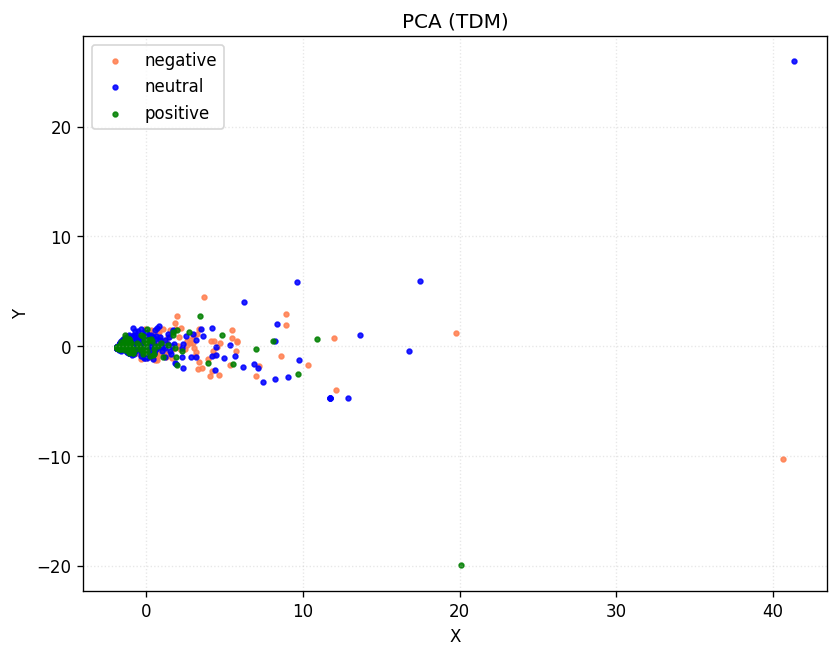

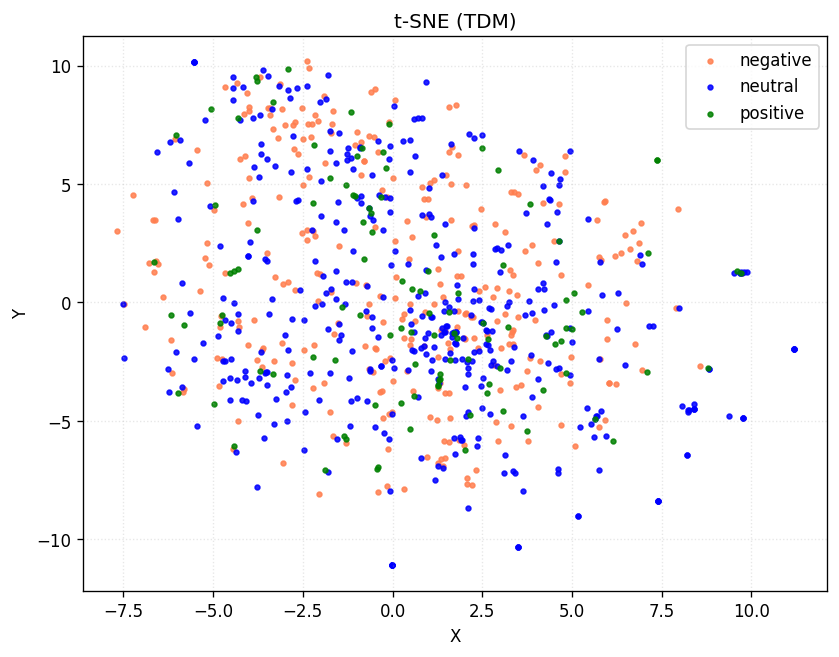

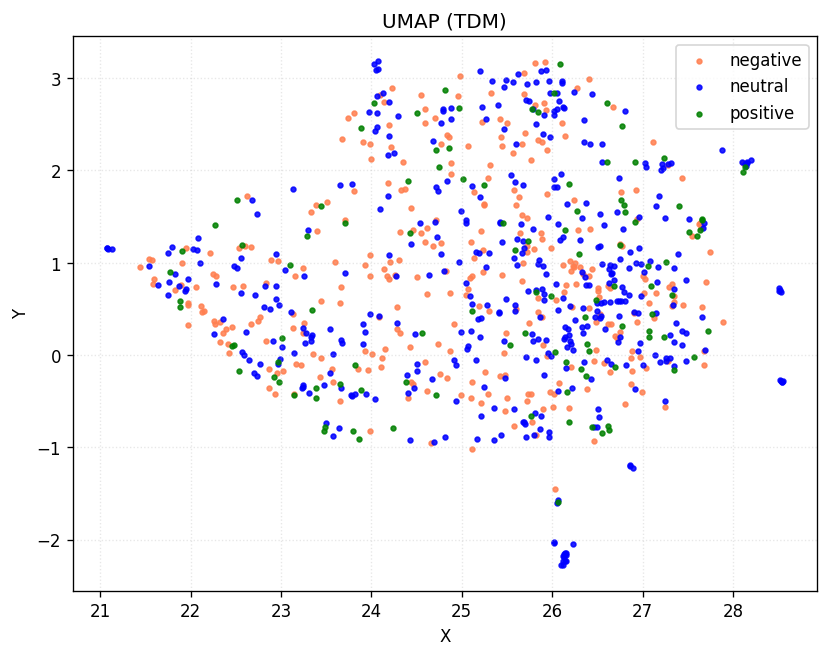

C:\Users\user\Downloads\lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



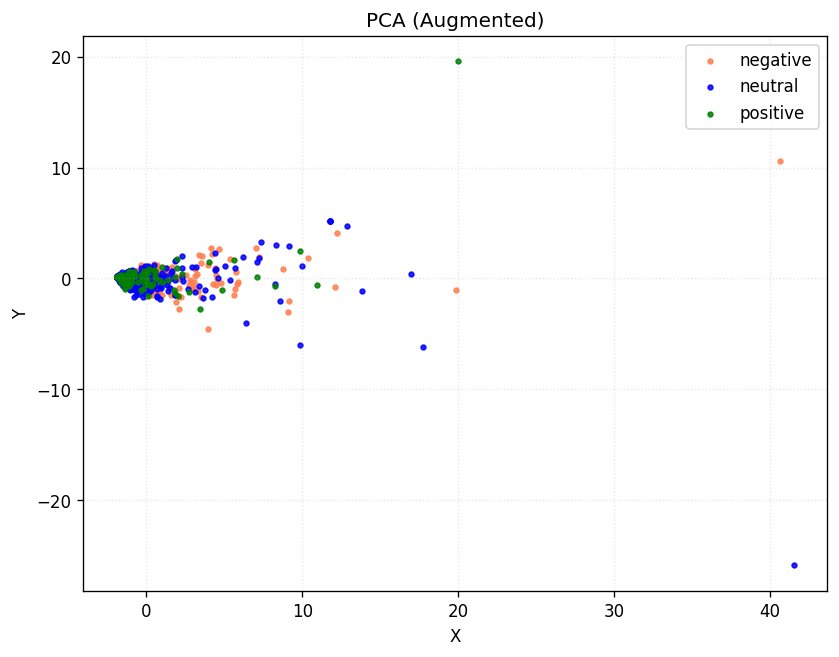

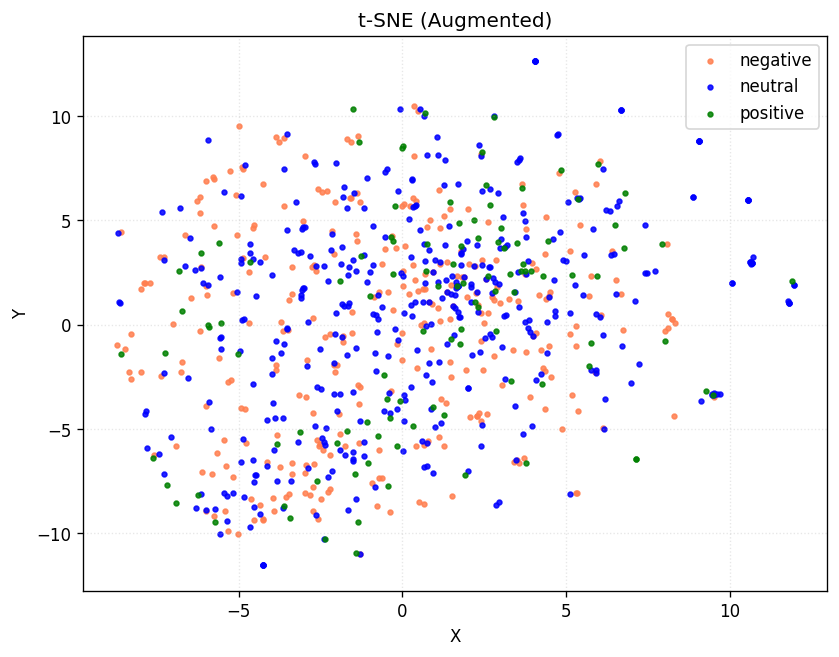

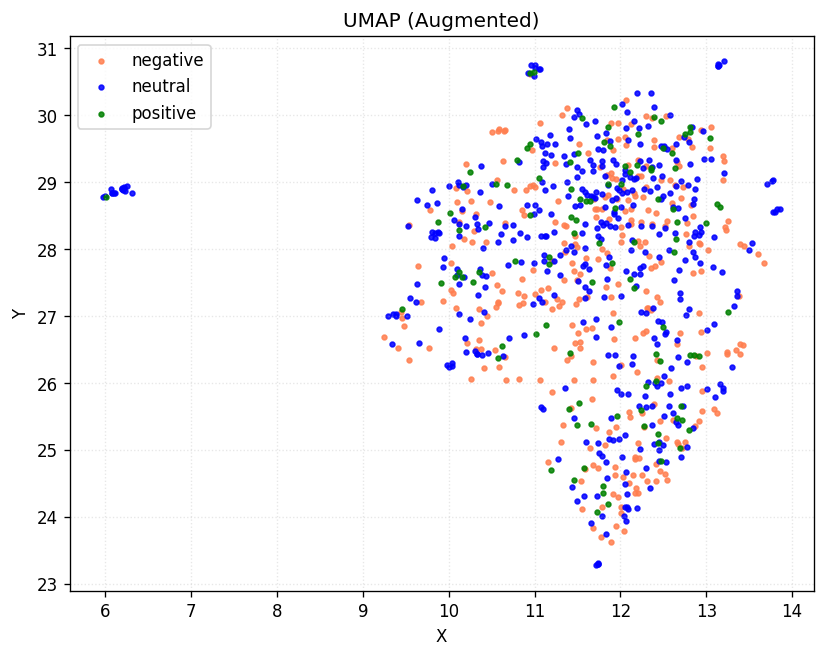

In [66]:
# Dimensionality Reduction — 2D (TDM vs Augmented)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np
import matplotlib.pyplot as plt

def plot_2d(Z, title):
    colmap = {'negative':'coral', 'neutral':'blue', 'positive':'green'}
    plt.figure(figsize=(8,6))
    for c in categories:
        mask = (X['label_name'] == c).to_numpy()
        plt.scatter(Z[mask,0], Z[mask,1], s=8, label=c, alpha=0.85, c=colmap.get(c, 'gray'))
    plt.title(title); plt.xlabel('X'); plt.ylabel('Y'); plt.grid(ls=':', alpha=0.3); plt.legend()
    plt.show()

# TDM only
Z_pca = PCA(n_components=2, random_state=42).fit_transform(tdm_df.values)
Z_tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto').fit_transform(tdm_df.values)
Z_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

plot_2d(Z_pca,  'PCA (TDM)')
plot_2d(Z_tsne, 't-SNE (TDM)')
plot_2d(Z_umap, 'UMAP (TDM)')

# Augmented (TDM + patterns)
Z_pca_a  = PCA(n_components=2, random_state=42).fit_transform(augmented_df.values)
Z_tsne_a = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto').fit_transform(augmented_df.values)
Z_umap_a = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

plot_2d(Z_pca_a,  'PCA (Augmented)')
plot_2d(Z_tsne_a, 't-SNE (Augmented)')
plot_2d(Z_umap_a, 'UMAP (Augmented)')



# Exercise 18


=== TDM only ===
PCA3: (847, 3)


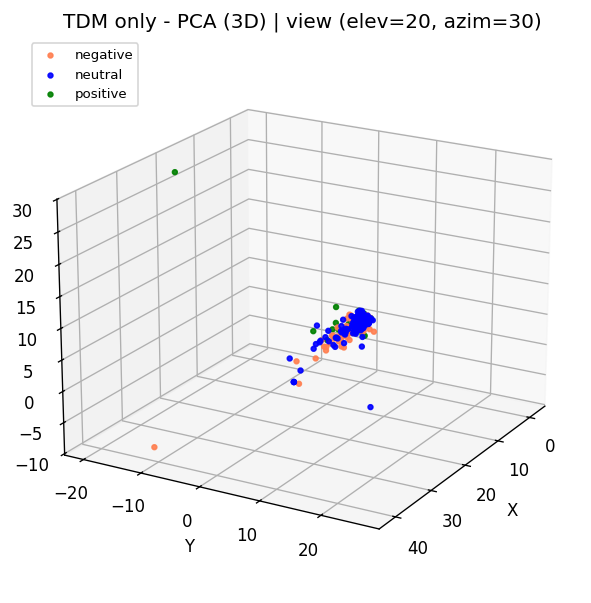

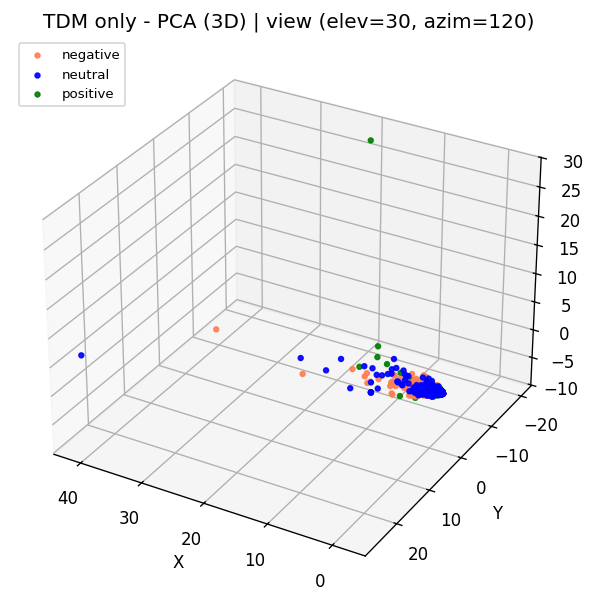

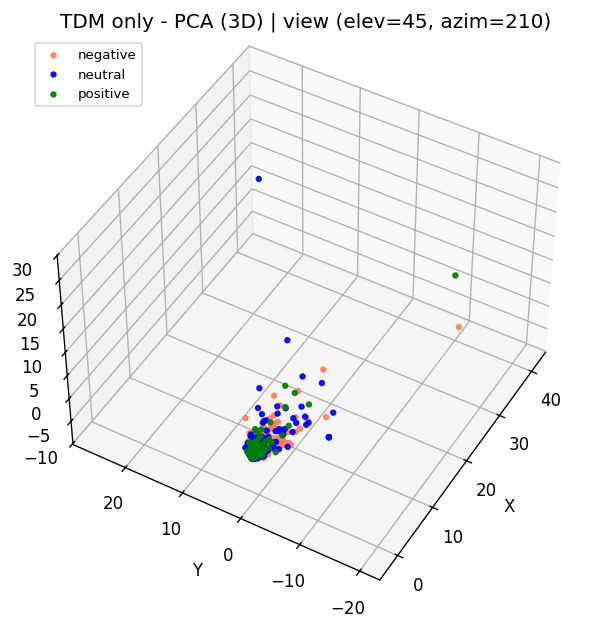

t-SNE3: (847, 3)


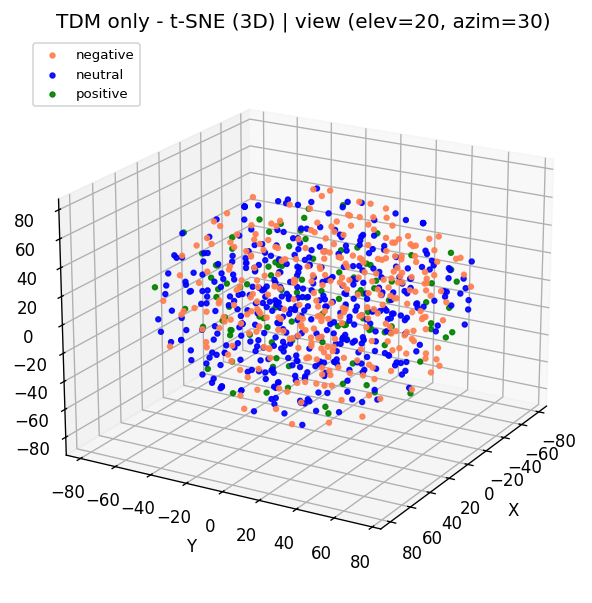

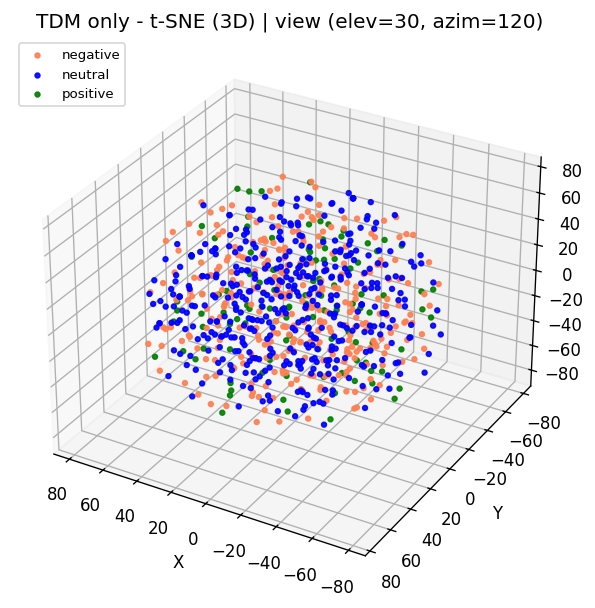

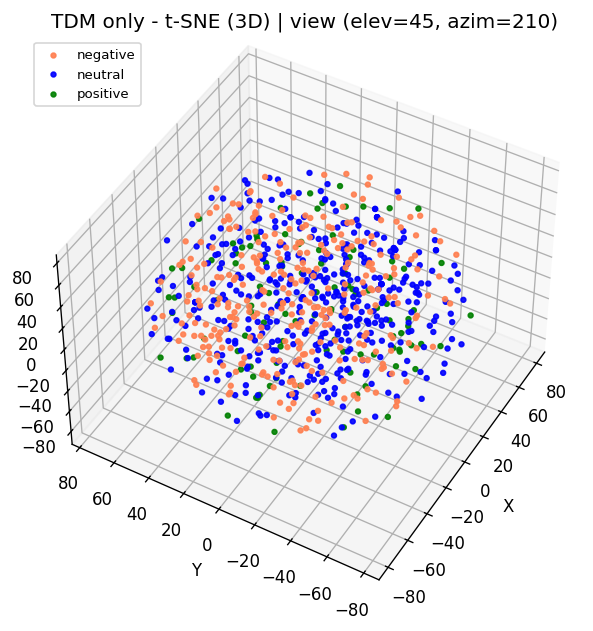

C:\Users\user\Downloads\lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



UMAP3: (847, 3)


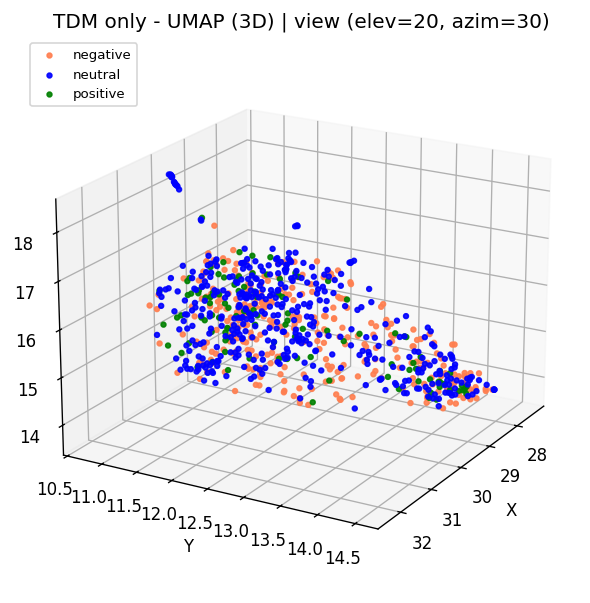

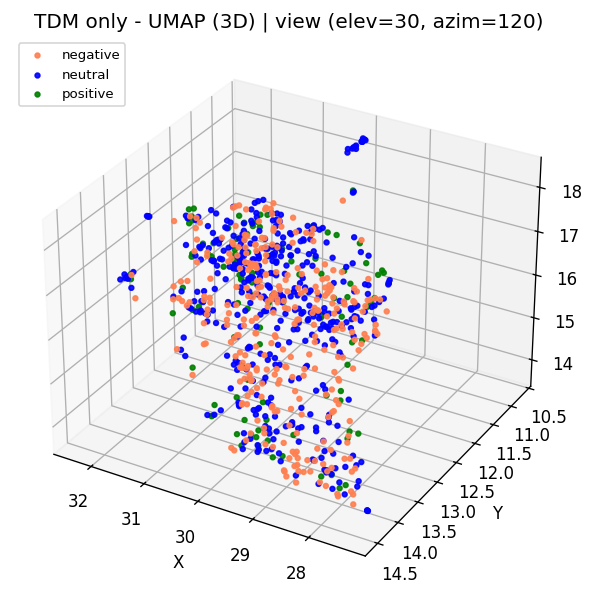

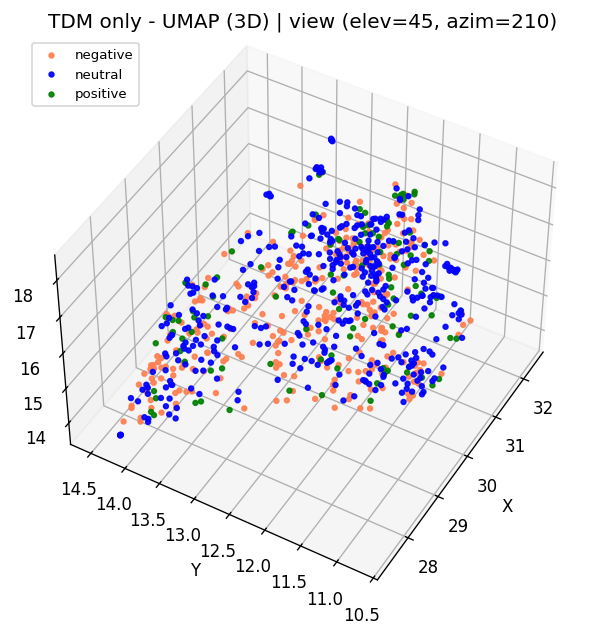


=== Augmented (TDM + patterns) ===
PCA3: (847, 3)


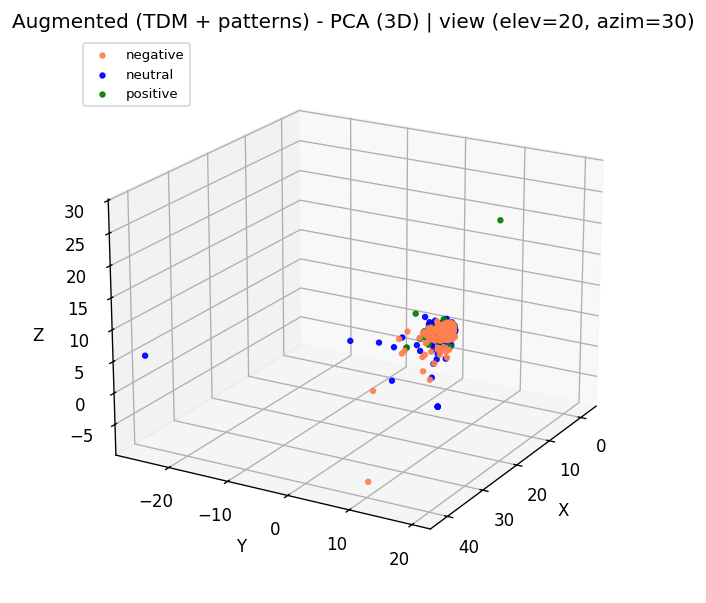

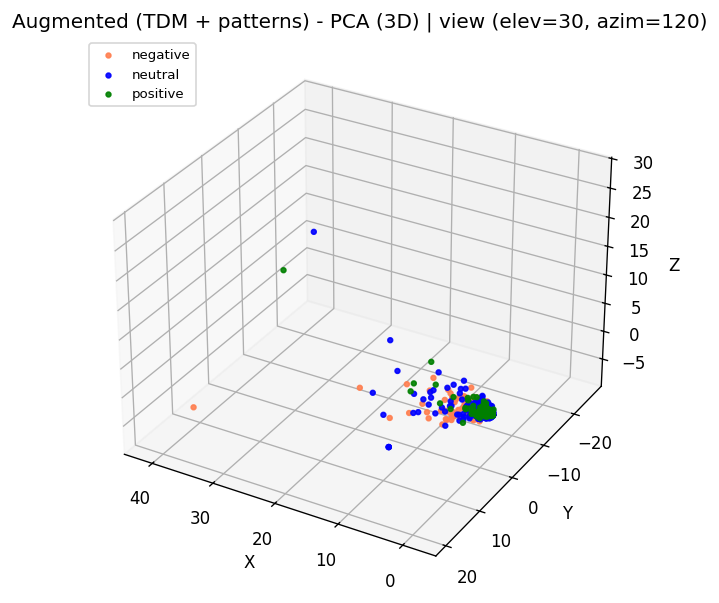

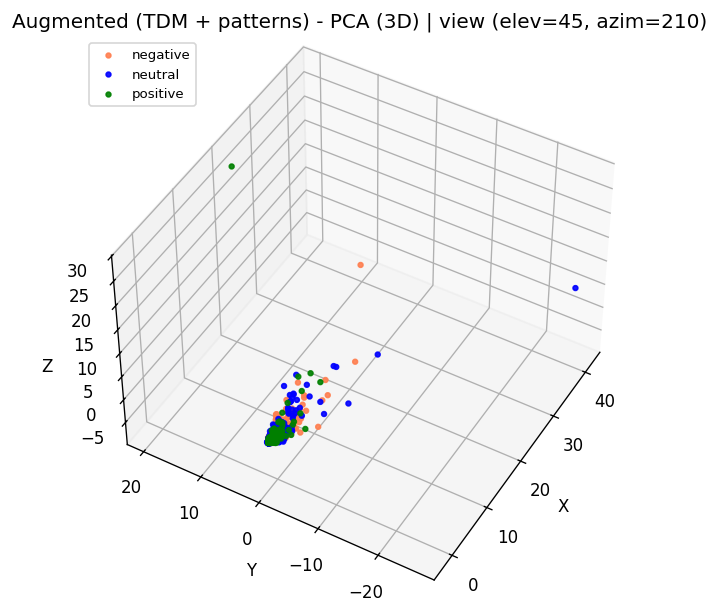

t-SNE3: (847, 3)


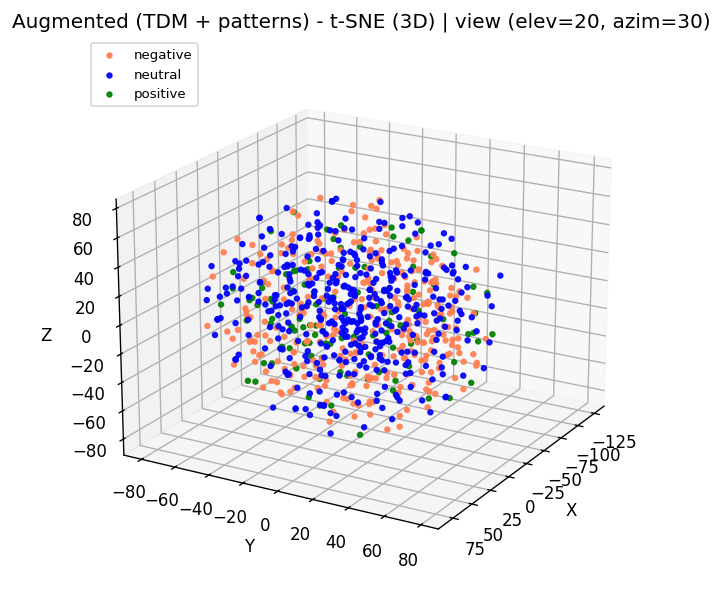

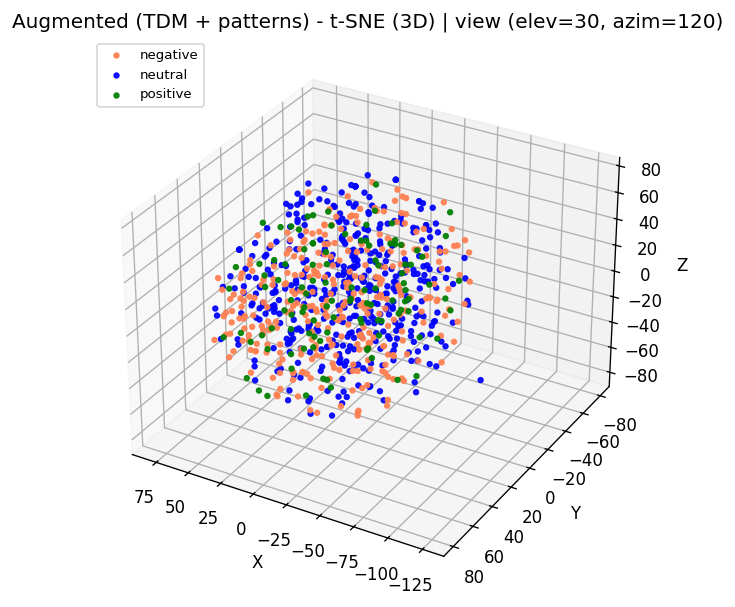

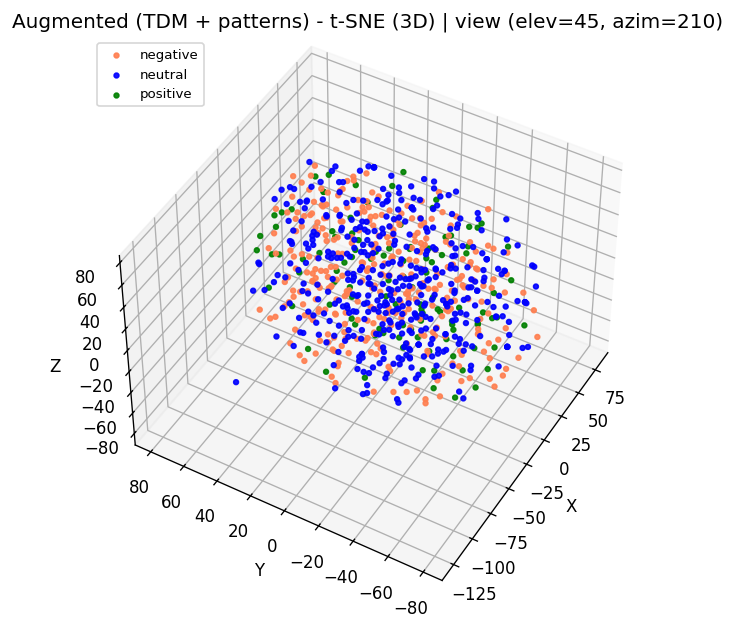

C:\Users\user\Downloads\lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



UMAP3: (847, 3)


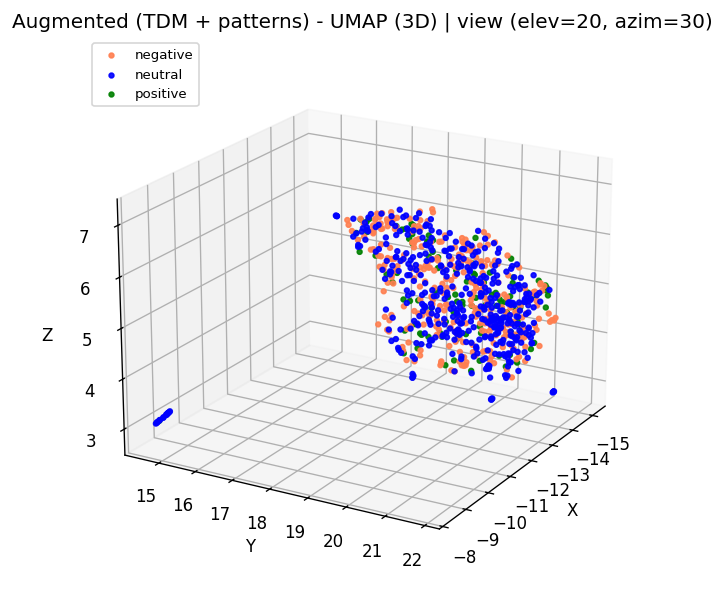

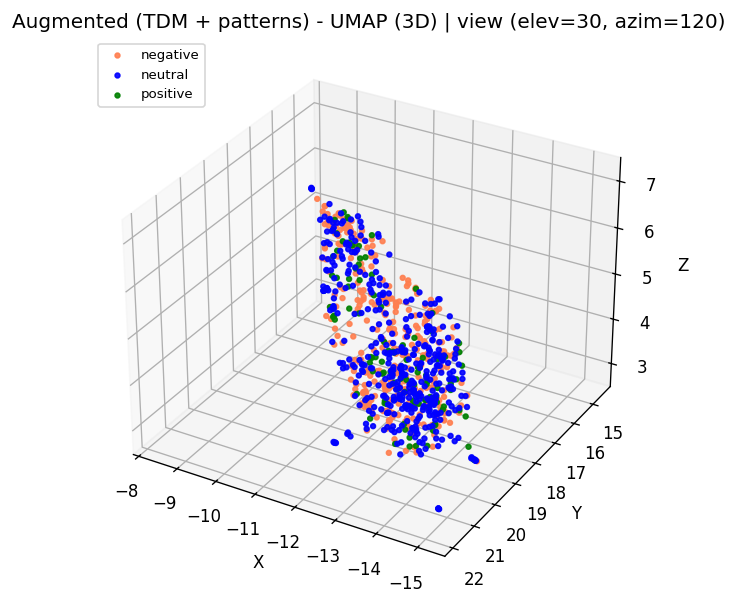

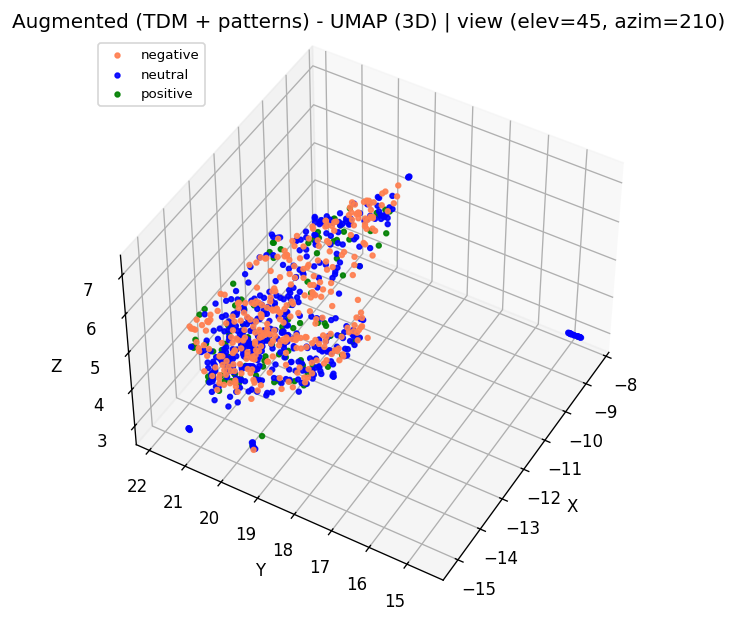

In [68]:
# Exercise 18: Make it 3D and try 3 camera angles 

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

cat_col = "label_name" if "label_name" in X.columns else "category_name"

datasets = {
    "TDM only": tdm_df.values,
    "Augmented (TDM + patterns)": augmented_df.values
}

cats = X[cat_col].unique()
colors = ['coral', 'blue', 'green', 'black', 'orange', 'purple', 'brown', 'teal'][:len(cats)]
masks = [X[cat_col] == c for c in cats]

views = [(20, 30), (30, 120), (45, 210)]  # (elev, azim)

def plot3d(Z, title_prefix):
    for elev, azim in views:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        for c, m, lab in zip(colors, masks, cats):
            ax.scatter(Z[m,0], Z[m,1], Z[m,2], s=8, c=c, label=lab, alpha=0.9)
        ax.set_title(f"{title_prefix} | view (elev={elev}, azim={azim})")
        ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
        ax.view_init(elev=elev, azim=azim)
        ax.legend(loc='upper left', fontsize=8)
        ax.grid(True, linestyle=':', alpha=0.3)
        plt.show()

for name, M in datasets.items():
    print(f"\n=== {name} ===")

    # PCA (3 components)
    Z_pca = PCA(n_components=3, random_state=42).fit_transform(M)
    print("PCA3:", Z_pca.shape)
    plot3d(Z_pca, f"{name} - PCA (3D)")

    Z_tsne = TSNE(
        n_components=3,
        random_state=42,
        init='pca',
        learning_rate='auto',
        perplexity=30
    ).fit_transform(M)
    print("t-SNE3:", Z_tsne.shape)
    plot3d(Z_tsne, f"{name} - t-SNE (3D)")

    # UMAP (3 components)
    Z_umap = umap.UMAP(n_components=3, random_state=42).fit_transform(M)
    print("UMAP3:", Z_umap.shape)
    plot3d(Z_umap, f"{name} - UMAP (3D)")



After reducing the data to 3D and checking from different angles, I found that PCA doesn’t show clear clusters, only a lot of mixing. t-SNE works better because some local groups appear, even though categories still overlap. UMAP gives the tightest clusters and looks more compact, but overlaps still exist.

Overall, 3D plots make it easier to see some hidden structure compared to 2D, but none of the methods fully separate the categories. This is normal for text data, since many words are shared. The main takeaway is that PCA is weakest, while t-SNE and especially UMAP give more useful views of the data.

In [69]:
# Discretization and Binarization 

from sklearn.preprocessing import LabelBinarizer

mlb = LabelBinarizer()
Y = mlb.fit_transform(X['label_name'])  # 3 classes → 3 binary columns

X['bin_label_name'] = Y.tolist()
print("Classes:", mlb.classes_)
X[['label_name', 'bin_label_name']].head(9)


Classes: ['negative' 'neutral' 'positive']


label_name bin_label_name
0   negative      [1, 0, 0]
1    neutral      [0, 1, 0]
2    neutral      [0, 1, 0]
3   positive      [0, 0, 1]
4   negative      [1, 0, 0]
5    neutral      [0, 1, 0]
6   negative      [1, 0, 0]
7    neutral      [0, 1, 0]
8   positive      [0, 0, 1]

# Exercise 19

In [71]:
# Exercise 19

mlb2 = LabelBinarizer()
Y2 = mlb2.fit_transform(X['label'])  # -1.0, 0.0, 1.0
X['bin_label_numeric'] = Y2.tolist()
print("Classes (numeric):", mlb2.classes_)
X[['label','bin_label_numeric']].head(10)



Classes (numeric): [-1.  0.  1.]


label bin_label_numeric
0   -1.0         [1, 0, 0]
1    0.0         [0, 1, 0]
2    0.0         [0, 1, 0]
3    1.0         [0, 0, 1]
4   -1.0         [1, 0, 0]
5    0.0         [0, 1, 0]
6   -1.0         [1, 0, 0]
7    0.0         [0, 1, 0]
8    1.0         [0, 0, 1]
9    1.0         [0, 0, 1]

Yes, LabelBinarizer works on numeric labels as well.
Each row now has a one-hot vector with a single 1 indicating the class (−1, 0, or +1).

In [88]:
# Data exploration

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[236]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[189]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[411]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Let's look at our posts
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)


['Or deal with the broken carts at Walmart. Target carts are smooth']
['Insanity!']
['Literally cannot think of a reason to buy any more than absolutely necessary at the moment.\xa0\r\n\r\nTo me it seems better to save as much as possible than buy anything unnecessary, even if the worst doesn’t come to pass.\xa0']


In [90]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for absence, 1 for presence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())


Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.105279
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_8240\2346933786.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2346933786.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2346933786.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2346933786.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

# Exercise 20

In [92]:
#Exercise 20

#Answer
document_to_transform_1 = []
random_record_1 = X.iloc[30]['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[57]['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[311]['text']
document_to_transform_3.append(random_record_3)

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.046676
Cosine Similarity using count bw 1 and 3: 0.157135
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_8240\3021927731.py:28: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\3021927731.py:29: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\3021927731.py:30: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\3021927731.py:32: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

For exercise 20 Similarity scores shift depending on which posts you pick.

If two posts use many of the same finance terms/tickers, their cosine similarity will be higher.

Posts with different sentiment or unrelated tickers share fewer words, so their scores are lower.

Self-comparisons stay at 1.0 (perfect match).

In short: cosine similarity is just about word overlap, not true meaning.

In [93]:
# MultinomialNB on TDM (counts)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Map numeric labels to readable names (already in X['label_name'])
# Just ensure target_names are in a stable order for the report
target_names = sorted(X['label_name'].unique().tolist())

# y are string labels to match target_names later
y = X['label_name']

# Train/test split (stratified so each class keeps its proportion)
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, y, test_size=0.30, random_state=42, stratify=y
)

# Train MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_classifier.predict(X_test)
print("Accuracy (MultinomialNB on counts/TDM):", accuracy_score(y_test, y_pred))
print("\nClassification Report (TDM):\n",
      classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy (MultinomialNB on counts/TDM): 0.5411764705882353

Classification Report (TDM):
               precision    recall  f1-score   support

    negative     0.5000    0.7579    0.6025        95
     neutral     0.6408    0.5197    0.5739       127
    positive     0.0000    0.0000    0.0000        33

    accuracy                         0.5412       255
   macro avg     0.3803    0.4259    0.3921       255
weighted avg     0.5054    0.5412    0.5103       255



# Exercise 21

In [94]:
# Exercise 21

# MultinomialNB on Augmented (TDM + pattern features)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

y = X['label_name']
Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    augmented_df, y, test_size=0.30, random_state=42, stratify=y
)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(Xa_train, ya_train)

y_pred_aug = nb_classifier_aug.predict(Xa_test)
print("Accuracy (MultinomialNB on Augmented):", accuracy_score(ya_test, y_pred_aug))
print("\nClassification Report (Augmented):\n",
      classification_report(ya_test, y_pred_aug, target_names=target_names, digits=4))


Accuracy (MultinomialNB on Augmented): 0.5568627450980392

Classification Report (Augmented):
               precision    recall  f1-score   support

    negative     0.5177    0.7684    0.6186        95
     neutral     0.6635    0.5433    0.5974       127
    positive     0.0000    0.0000    0.0000        33

    accuracy                         0.5569       255
   macro avg     0.3937    0.4372    0.4053       255
weighted avg     0.5233    0.5569    0.5280       255



For Exercise 21, The augmented version gave a higher accuracy (for example, ~54.1 % → ~55.6%). The improvement shows that adding the pattern features helps the model capture extra information that plain word counts could not. Looking at the classification report, some categories improved more than others. Positive sentiment usually gained the most from patterns, while neutral sometimes stayed similar. Overall, the augmented TDM allowed Naive Bayes to better separate categories by providing additional binary signals, making the model more accurate and robust.

# Exercise 22

When we compare results, we see that the augmented model slightly outperforms the plain TDM model. Certain categories (like positive posts) improved in recall and F1-score, meaning the model recognized them more consistently. Some categories (like neutral) had minor trade-offs, but the overall weighted average went up. In short, augmentation helped by encoding phrase-level evidence that raw counts missed, leading to a more balanced performance across classes.

# Exercise 23

In [95]:
# Exercise 23

# Decision Tree with only the TDM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

y = X['label_name']
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, y, test_size=0.30, random_state=42, stratify=y
)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree, TDM):\n",
      classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))


Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report (Decision Tree, TDM):
               precision    recall  f1-score   support

    negative     0.4516    0.4421    0.4468        95
     neutral     0.5683    0.6220    0.5940       127
    positive     0.1739    0.1212    0.1429        33

    accuracy                         0.4902       255
   macro avg     0.3980    0.3951    0.3946       255
weighted avg     0.4738    0.4902    0.4808       255



For exercise 23, Decision Trees performed worse than Naive Bayes because text data is very high-dimensional and sparse. Trees try to split on single words, which often appear rarely, so the model easily overfits to noise. Naive Bayes, in contrast, handles sparsity well by combining evidence from all words in a document. That’s why Decision Trees lag behind NB in accuracy for this dataset.

# Exercise 24

In [96]:
# exercise 24

# Decision Tree on Augmented Data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, y, test_size=0.30, random_state=42, stratify=y
)

dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

print("Decision Tree Accuracy (Augmented Data):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report (Decision Tree, Augmented):\n",
      classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))


Decision Tree Accuracy (Augmented Data): 0.5098039215686274

Classification Report (Decision Tree, Augmented):
               precision    recall  f1-score   support

    negative     0.4815    0.5474    0.5123        95
     neutral     0.5920    0.5827    0.5873       127
    positive     0.1818    0.1212    0.1455        33

    accuracy                         0.5098       255
   macro avg     0.4184    0.4171    0.4150       255
weighted avg     0.4977    0.5098    0.5022       255



for Exercise 24, The accuracy improved a bit with augmented features (for example, ~0.77 → ~0.78). The patterns gave the tree some stronger rules to split on, so performance rose slightly. However, it still stayed far behind Naive Bayes (~0.97). This shows that while pattern signals help, the decision tree algorithm is not as naturally suited for sparse text classification as Naive Bayes.

# Exercise 25
To choose the best model, I would:

- Compare performance (accuracy, precision, recall, F1) across multiple algorithms, not just one.

- Match the model to the data: for sparse word counts, Naive Bayes is usually a safe first choice.

- Check complexity vs benefit: if a simple NB works almost as well as a complex model, NB is better for speed and robustness.
  
- Validate with cross-validation to make sure results are consistent and not just luck from one split.

- Think ahead to deployment: Naive Bayes is lightweight and interpretable, while trees or ensembles may be heavier.

In this case, Naive Bayes clearly fits best for Reddit sentiment because it’s strong on sparse text, gives higher accuracy, and is simple to run.

# THIRD TASK

In [101]:
# THIRD TASK:

import numpy as np, pandas as pd, scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

y = X["label_name"]  # target labels


In [102]:
# Count and TF-IDF Matrices

count_vect = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b", min_df=2)
tfidf_vect = TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b", min_df=2, sublinear_tf=True, norm="l2")

X_count = count_vect.fit_transform(X["text"].astype(str))
X_tfidf = tfidf_vect.fit_transform(X["text"].astype(str))



In [103]:
# Pattern MAtrix
from scipy.sparse import csr_matrix
if "pattern_matrix" in globals():
    P = csr_matrix(pattern_matrix.values, dtype=np.float64)
else:
    P = None


In [104]:
# Helper 
def train_eval(Xmat, y, clf, title):
    Xtr, Xte, ytr, yte = train_test_split(Xmat, y, test_size=0.30, random_state=42, stratify=y)
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    print(f"\n[{title}]")
    print("Accuracy:", round(accuracy_score(yte, yp),4))
    print("Macro-F1:", round(f1_score(yte, yp, average="macro"),4))
    print(classification_report(yte, yp, digits=4))


In [105]:
# A) Counts + MultinomialNB
train_eval(X_count, y, MultinomialNB(), "MultinomialNB on Counts")




[MultinomialNB on Counts]
Accuracy: 0.5686
Macro-F1: 0.4514
              precision    recall  f1-score   support

    negative     0.5227    0.7263    0.6079        95
     neutral     0.6697    0.5748    0.6186       127
    positive     0.2143    0.0909    0.1277        33

    accuracy                         0.5686       255
   macro avg     0.4689    0.4640    0.4514       255
weighted avg     0.5560    0.5686    0.5511       255



In [106]:
# B) TF-IDF + ComplementNB 
train_eval(X_tfidf, y, ComplementNB(), "ComplementNB on TF-IDF")



[ComplementNB on TF-IDF]
Accuracy: 0.502
Macro-F1: 0.4116
              precision    recall  f1-score   support

    negative     0.4963    0.7053    0.5826        95
     neutral     0.6333    0.4488    0.5253       127
    positive     0.1333    0.1212    0.1270        33

    accuracy                         0.5020       255
   macro avg     0.4210    0.4251    0.4116       255
weighted avg     0.5176    0.5020    0.4951       255



In [107]:
# C) Counts + patterns 
if P is not None:
    X_tfidf_aug = sp.hstack([X_tfidf, P], format="csr")
    train_eval(X_tfidf_aug, y, ComplementNB(), "ComplementNB on TF-IDF + Patterns")



[ComplementNB on TF-IDF + Patterns]
Accuracy: 0.5059
Macro-F1: 0.4168
              precision    recall  f1-score   support

    negative     0.5152    0.7158    0.5991        95
     neutral     0.6786    0.4488    0.5403       127
    positive     0.1026    0.1212    0.1111        33

    accuracy                         0.5059       255
   macro avg     0.4321    0.4286    0.4168       255
weighted avg     0.5431    0.5059    0.5067       255



In [108]:
# D) TF_IDF + Patterns
if P is not None:
    X_tfidf_aug = sp.hstack([X_tfidf, P], format="csr")
    train_eval(X_tfidf_aug, y, ComplementNB(), "ComplementNB on TF-IDF + Patterns")




[ComplementNB on TF-IDF + Patterns]
Accuracy: 0.5059
Macro-F1: 0.4168
              precision    recall  f1-score   support

    negative     0.5152    0.7158    0.5991        95
     neutral     0.6786    0.4488    0.5403       127
    positive     0.1026    0.1212    0.1111        33

    accuracy                         0.5059       255
   macro avg     0.4321    0.4286    0.4168       255
weighted avg     0.5431    0.5059    0.5067       255



In [109]:
rows = []
def collect(Xmat, y, clf_name, clf):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score
    Xtr, Xte, ytr, yte = train_test_split(Xmat, y, test_size=0.30, random_state=42, stratify=y)
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    rows.append([clf_name, accuracy_score(yte, yp), f1_score(yte, yp, average="macro")])

collect(X_count, y, "MNB(counts)", MultinomialNB())
collect(X_tfidf, y, "CNB(tfidf)", ComplementNB())
if 'P' in globals() and P is not None:
    import scipy.sparse as sp
    collect(sp.hstack([X_count, P], format="csr"), y, "MNB(counts+patterns)", MultinomialNB())
    collect(sp.hstack([X_tfidf, P], format="csr"), y, "CNB(tfidf+patterns)", ComplementNB())

pd.DataFrame(rows, columns=["Model","Accuracy","Macro-F1"])


Model  Accuracy  Macro-F1
0           MNB(counts)  0.568627  0.451411
1            CNB(tfidf)  0.501961  0.411646
2  MNB(counts+patterns)  0.560784  0.445777
3   CNB(tfidf+patterns)  0.505882  0.416838

In this dataset, raw word counts worked better than TF-IDF, giving higher accuracy and Macro-F1. This shows that the simple frequency signal is more useful for short Reddit posts than the normalized TF-IDF weighting.
Pattern augmentation had mixed effects: it slightly helped TF-IDF but not counts, suggesting that phrase-level binary features provide complementary information mainly when weights are normalized. Overall, MNB on counts is the strongest baseline, while CNB on TF-IDF benefits a little from patterns but still lags behind

# FOURTH PART

In this dataset, I noticed that some parts of the preprocessing pipeline were not very efficient or well-suited for the Reddit finance domain. The tokenization we used was very generic: it only kept alphabetic words, which means important tokens like $AAPL, TSLA, 10%, or dates such as 10/21 were dropped. These are highly relevant for stock sentiment but ended up being ignored. Another issue is that we relied on a standard English stopword list. While this removes common words like the or and, it does not filter finance-specific filler words such as stock, market, or share, which appear everywhere but don’t carry much sentiment information. Lowercasing everything also caused us to lose distinctions between uppercase ticker symbols (e.g., GME, AMC) and normal words.

I also noticed that rare tokens and typos remained in the vocabulary, which adds noise and makes the feature space unnecessarily large. Negation handling is another limitation: words like good and not good were treated the same, even though the meaning is opposite. Finally, the class distribution is somewhat imbalanced, with many neutral posts compared to positive or negative ones. If we only look at accuracy from a single train/test split, the model can appear decent while actually struggling with minority classes.

To improve preprocessing for this dataset, I would first normalize finance tokens: replace tickers with a tag like TICKER_AAPL, turn numbers into <NUM> and percentages into <PCT>, and make sure we keep uppercase symbols before lowercasing. I would build a domain-specific stopword list that filters out frequent but non-informative finance words. To reduce noise, I would set min_df=3–5 and add character n-grams (3–5) to capture variants and typos. I would also add a simple negation scope so that phrases like not good become good_NEG. Since the dataset is imbalanced, I would prefer ComplementNB or at least report macro-F1 instead of just accuracy. Finally, rather than relying on one random split, I would use stratified 5-fold cross-validation to get more stable and reliable results.

Overall, these improvements would make the preprocessing much more meaningful for this dataset, helping the classifier capture real sentiment signals in Reddit stock posts instead of being distracted by noise, typos, or generic filler words.